# Data Exploration


### Imports

In [2]:
import os
import sys

In [3]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

from data_exploration import *

 - plot_correlation_matrix_heat_map(df,label,qty_fields=10)
 
 This function takes a dataframe, a variable label (to find correlations against) and a top number of correlations to display. It then prints a seaborn heatmap of the correlations.
 
 For example, if you wished to find the top ten variables correlated with the target variable, you would pass the target name as 'label' and receive a heatmap from the function.

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Data
Read in the analytic data set from your data_cleaning notebook.

In [5]:
# to allow for all variables to be displayed in jupyter
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 500)

In [6]:
data_path = '../data/interim/'
df = pd.read_csv(data_path+'ngv_analytic.csv')

In [340]:
drop_col_list = []
for col in df.columns:
    if col.find('.') > -1:
        drop_col_list.append(col)
# confirming no duplicates
drop_col_list

[]

In [7]:
df.head()

transactionid  isfraud  transactiondt  transactionamt productcd  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  p_emaildomain r_emaildomain   c1   c2   c3   c4   c5   c6   c7   c8   c9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   c10  c11  c12   c13  c14     d1     d2    d3    d4   d5  d6  d7  d8  d9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    d10    d11  d12  d13  d14    d15   m1   m2   m3   m4   m5   m6   m7   m8  \
0  13.0   13.0  NaN  NaN  NaN    0.0  1.0  1.0  1.0   M2  0.0  1.0  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0  1.0  1.0  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0  1.0  1.0  1.0   M0  0.0  0.0  0.0  0.0   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0  1.0  0.0  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    m9   v1   v2   v3   v4   v5  v5.1   v6   v7   v8   v9  v10  v11  v12  \
0  NaN  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   
2  0.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   v12.1  v13  v14  v15  v16  v17  v18  v19  v20  v21  v22  v23  v24  v25  \
0    1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2    1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3    1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   v26  v27  v28  v29  v30  v31  v32  v33  v34  v35  v36  v37  v38  v39  v40  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   v41  v42  v42.1  v43  v44  v45  v46  v47  v48  v49  v50  v51  v52  v53  \
0  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0   
1  1.0  0.0    0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0    0.0  0.0  1.0  1.0  1.0  1.0 

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 442 columns):
 #   Column          Dtype  
---  ------          -----  
 0   transactionid   int64  
 1   isfraud         int64  
 2   transactiondt   int64  
 3   transactionamt  float64
 4   productcd       object 
 5   card1           int64  
 6   card2           float64
 7   card3           float64
 8   card4           object 
 9   card5           float64
 10  card6           object 
 11  addr1           float64
 12  addr2           float64
 13  dist1           float64
 14  dist2           float64
 15  p_emaildomain   object 
 16  r_emaildomain   object 
 17  c1              float64
 18  c2              float64
 19  c3              float64
 20  c4              float64
 21  c5              float64
 22  c6              float64
 23  c7              float64
 24  c8              float64
 25  c9              float64
 26  c10             float64
 27  c11             float64
 28  c12          

### Categorical Exploration
The encoding discussed in this section will be implemented in the src .py files

#### Binary Categoricals

In [9]:
# noticed that some transaction amounts have more than 2 decimals implying a currency conversion
# creating a feature to track that
df['transactionamt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: transactionamt, dtype: float64

In [10]:
df['transactionamt_long_dec'] = df['transactionamt'].apply(lambda x: len(str(x).split('.')[1]))
df['transactionamt_long_dec'] = df['transactionamt_long_dec'].apply(lambda x: 1 if x > 2 else 0)
df['transactionamt_long_dec'].value_counts()

0    528607
1     61933
Name: transactionamt_long_dec, dtype: int64

In [11]:
# all categories that are encoded as 1/0 - this has already been performed during cleaning
binary_cats = ['m1', 'm2', 'm3', 'm5', 'm6', 'm7',
               'm8', 'm9', 'DeviceType', 'id_12',
               'id_16', 'id_27', 'id_28', 'id_29',
               'id_35', 'id_36', 'id_37', 'id_38',
               'transactionamt_long_dec']

In [12]:
df[binary_cats].describe()

m1             m2             m3             m5  \
count  319440.000000  319440.000000  319440.000000  240058.000000   
mean        0.999922       0.893651       0.788038       0.448088   
std         0.008846       0.308284       0.408698       0.497299   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  m6             m7             m8             m9  \
count  421180.000000  244275.000000  244288.000000  244288.000000   
mean        0.459006       0.134688       0.364476       0.841859   
std         0.498317       0.341391       0.481284       0.364874   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          DeviceType          id_12          id_16        id_27  \
count  140810.000000  144233.000000  129340.000000  5169.000000   
mean        0.604822       0.147040       0.512788     0.997292   
std         0.488891       0.354147       0.499838     0.051977   
min         0.000000       0.000000       0.000000     0.000000   
25%         0.000000       0.000000       0.000000     1.000000   
50%         1.000000       0.000000       1.000000     1.000000   
75%         1.000000       0.000000       1.000000     1.000000   
max         1.000000       1.000000       1.000000     1.000000   

               id_28          id_29          id_35          id_36  \
count  140978.000000  140978.000000  140985.000000  140985.000000   
mean        0.540737       0.531473       0.551931       0.049076   
std         0.498340       0.499010       0.497298       0.216028   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               id_37          id_38  transactionamt_long_dec  
count  140985.000000  140985.000000            590540.000000  
mean        0.783431       0.475675                 0.104875  
std         0.411908       0.499410                 0.306393  
min         0.000000       0.000000                 0.000000  
25%         1.000000       0.000000                 0.000000  
50%         1.000000       0.000000                 0.000000  
75%         1.000000       1.000000                 0.000000  
max         1.000000       1.000000                 1.000000

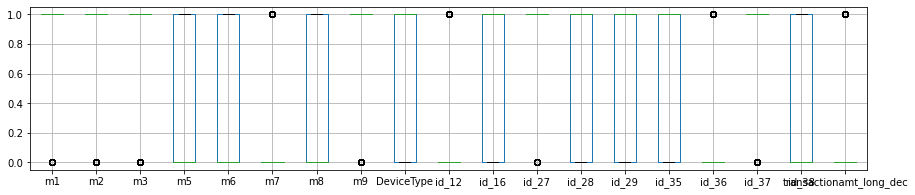

In [13]:
df[binary_cats].boxplot(figsize=[15,3])

#### Label Encoded Categoricals
All categories that will be Label encoded with integers. LGBM natively handles categoricals encoded with integers if the column names are passed to the categorical_feature parameter. Negative integers are treated as NaN's and will be avoided. The native handling is comparable to target encoding.

In [14]:
# id_34 is encoded with the range of -1 through 2.
# It will be incremented by one to prevent the negatives being interpreted as NaNs

# this was added to data_cleaning.py where this column's initial encoding occurs.

# df['id_34'] += 1
df['id_34'].value_counts()

3.0    60011
2.0    17376
1.0      415
0.0        3
Name: id_34, dtype: int64

In [15]:
# encode as integers without any additional processing
labeling_cats = ['productcd', 'card4', 'card6', 'm4', 'id_15',
                 'id_23', 'p_emaildomain', 'r_emaildomain']

In [16]:
def ngv_label_encode(label_col_list):
    label_dicts = {}
    # gets unique values in reverse order by frequency
    for cat in label_col_list:
        temp_keys = list(df[cat].value_counts().index)[::-1]
        temp_values = range(len(temp_keys))
        temp_dict = dict(zip(temp_keys, temp_values))
        label_dicts.update({cat: temp_dict})
    # performs the encoding
    for key, value in label_dicts.items():
        df[key] = df[key].map(value)

In [17]:
# generating a list of dictionaries for mapping values to label encode
# ordered by their frequency to allow the option of encoding as a category or ordinal list
label_dicts = {}
for cat in labeling_cats:
    # gets unique values in reverse order by frequency
    temp_keys = list(df[cat].value_counts().index)[::-1]
    temp_values = range(len(temp_keys))
    temp_dict = dict(zip(temp_keys, temp_values))
    label_dicts.update({cat: temp_dict})

In [18]:
label_dicts

{'productcd': {'S': 0, 'H': 1, 'R': 2, 'C': 3, 'W': 4},
 'card4': {'discover': 0, 'american express': 1, 'mastercard': 2, 'visa': 3},
 'card6': {'charge card': 0, 'debit or credit': 1, 'credit': 2, 'debit': 3},
 'm4': {'M1': 0, 'M2': 1, 'M0': 2},
 'id_15': {'Unknown': 0, 'New': 1, 'Found': 2},
 'id_23': {'IP_PROXY:HIDDEN': 0,
  'IP_PROXY:ANONYMOUS': 1,
  'IP_PROXY:TRANSPARENT': 2},
 'p_emaildomain': {'yahoo.co.jp': 0,
  'servicios-ta.com': 1,
  'hotmail.de': 2,
  'yahoo.co.uk': 3,
  'live.fr': 4,
  'ptd.net': 5,
  'yahoo.de': 6,
  'protonmail.com': 7,
  'hotmail.co.uk': 8,
  'yahoo.es': 9,
  'yahoo.fr': 10,
  'gmx.de': 11,
  'cableone.net': 12,
  'sc.rr.com': 13,
  'cfl.rr.com': 14,
  'suddenlink.net': 15,
  'q.com': 16,
  'frontiernet.net': 17,
  'netzero.net': 18,
  'centurylink.net': 19,
  'prodigy.net.mx': 20,
  'netzero.com': 21,
  'twc.com': 22,
  'web.de': 23,
  'embarqmail.com': 24,
  'frontier.com': 25,
  'hotmail.fr': 26,
  'roadrunner.com': 27,
  'windstream.net': 28,
  'hot

In [19]:
df[labeling_cats].head()

productcd       card4   card6   m4 id_15 id_23 p_emaildomain r_emaildomain
0         W    discover  credit   M2   NaN   NaN           NaN           NaN
1         W  mastercard  credit   M0   NaN   NaN     gmail.com           NaN
2         W        visa   debit   M0   NaN   NaN   outlook.com           NaN
3         W  mastercard   debit   M0   NaN   NaN     yahoo.com           NaN
4         H  mastercard  credit  NaN   New   NaN     gmail.com           NaN

In [20]:
for key, value in label_dicts.items():
    df[key] = df[key].map(value)

In [21]:
df[labeling_cats].head()

productcd  card4  card6   m4  id_15  id_23  p_emaildomain  r_emaildomain
0          4    0.0    2.0  1.0    NaN    NaN            NaN            NaN
1          4    2.0    2.0  2.0    NaN    NaN           58.0            NaN
2          4    3.0    3.0  2.0    NaN    NaN           51.0            NaN
3          4    2.0    3.0  2.0    NaN    NaN           57.0            NaN
4          1    2.0    2.0  NaN    1.0    NaN           58.0            NaN

In [22]:
for col in labeling_cats:
    print(df[col].value_counts())

4    439670
3     68519
2     37699
1     33024
0     11628
Name: productcd, dtype: int64
3.0    384767
2.0    189217
1.0      8328
0.0      6651
Name: card4, dtype: int64
3.0    439938
2.0    148986
1.0        30
0.0        15
Name: card6, dtype: int64
2.0    196405
1.0     59865
0.0     52826
Name: m4, dtype: int64
2.0    67728
1.0    61612
0.0    11645
Name: id_15, dtype: int64
2.0    3489
1.0    1071
0.0     609
Name: id_23, dtype: int64
58.0    228355
57.0    100934
56.0     45250
55.0     36998
54.0     28289
53.0      7888
52.0      6267
51.0      5096
50.0      4092
49.0      4033
48.0      3041
47.0      2970
46.0      2705
45.0      2396
44.0      1909
43.0      1543
42.0      1522
41.0      1393
40.0      1011
39.0       816
38.0       749
37.0       664
36.0       559
35.0       514
34.0       496
33.0       438
32.0       436
31.0       322
30.0       315
27.0       305
28.0       305
29.0       305
26.0       295
25.0       280
24.0       260
23.0       240
22.0       230

#### Numerical Categoricals
These will be kept as is because they seem to have ordinality upon inspection

In [23]:
num_cats = ['card1', 'card2', 'card3', 'card5',
            'addr1', 'addr2', 'id_13', 'id_14',
            'id_17', 'id_18', 'id_19', 'id_20',
            'id_21', 'id_22', 'id_24', 'id_25',
            'id_26', 'id_32']
for col in num_cats:
    print(col+"'s count of unique values ",len(df[col].value_counts()))

card1's count of unique values  13553
card2's count of unique values  500
card3's count of unique values  114
card5's count of unique values  119
addr1's count of unique values  332
addr2's count of unique values  74
id_13's count of unique values  54
id_14's count of unique values  25
id_17's count of unique values  104
id_18's count of unique values  18
id_19's count of unique values  522
id_20's count of unique values  394
id_21's count of unique values  490
id_22's count of unique values  25
id_24's count of unique values  12
id_25's count of unique values  341
id_26's count of unique values  95
id_32's count of unique values  4


In [24]:
df[num_cats].describe()

card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2          id_13         id_14  \
count  524834.000000  524834.000000  127320.000000  80044.000000   
mean      290.733794      86.800630      48.053071   -344.507146   
std       101.741072       2.690623      11.774858     93.695502   
min       100.000000      10.000000      10.000000   -660.000000   
25%       204.000000      87.000000      49.000000   -360.000000   
50%       299.000000      87.000000      52.000000   -300.000000   
75%       330.000000      87.000000      52.000000   -300.000000   
max       540.000000     102.000000      64.000000    720.000000   

               id_17         id_18          id_19          id_20        id_21  \
count  139369.000000  45113.000000  139318.000000  139261.000000  5159.000000   
mean      189.451377     14.237337     353.128174     403.882666   368.269820   
std        30.375360      1.561302     141.095343     152.160327   198.847038   
min       100.000000     10.000000     100.000000     100.000000   100.000000   
25%       166.000000     13.000000     266.000000     256.000000   252.000000   
50%       166.000000     15.000000     341.000000     472.000000   252.000000   
75%       225.000000     15.000000     427.000000     533.000000   486.500000   
max       229.000000     29.000000     671.000000     661.000000   854.000000   

             id_22        id_24        id_25        id_26         id_32  
count  5169.000000  4747.000000  5132.000000  5163.000000  77586.000000  
mean     16.002708    12.800927   329.608924   149.070308     26.508597  
std       6.897665     2.372447    97.461089    32.101995      3.737502  
min      10.000000    11.000000   100.000000   100.000000      0.000000  
25%      14.000000    11.000000   321.000000   119.000000     24.000000  
50%      14.000000    11.000000   321.000000   149.000000     24.000000  
75%      14.000000    15.000000   371.000000   169.000000     32.000000  
max      44.000000    26.000000   548.000000   216.000000     32.000000

In [25]:
num_vhigh = [col for col in num_cats if (df[col].mean() > 1000)]
num_high = [col for col in num_cats if ((df[col].mean() > 250) and (df[col].mean() < 1000))]
num_mid = [col for col in num_cats if ((df[col].mean() > 50) and (df[col].mean() < 250))]
num_low = [col for col in num_cats if ((df[col].mean() > 0) and (df[col].mean() < 50))]
num_neg = [col for col in num_cats if (df[col].mean() < 0)]

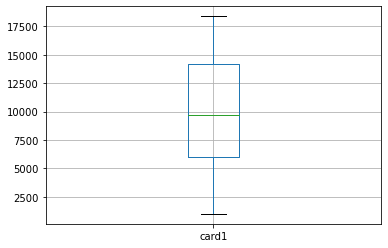

In [26]:
df[num_vhigh].boxplot()

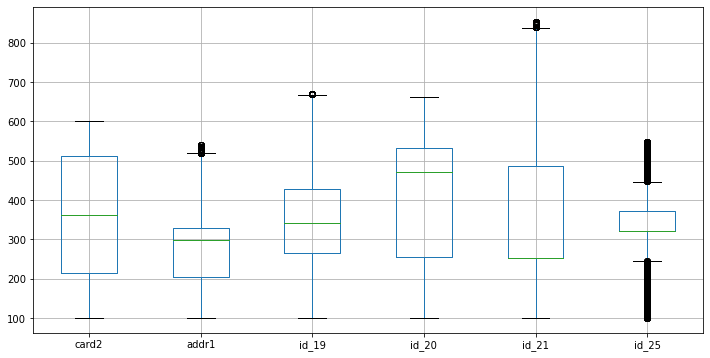

In [27]:
df[num_high].boxplot(figsize=[12,6])

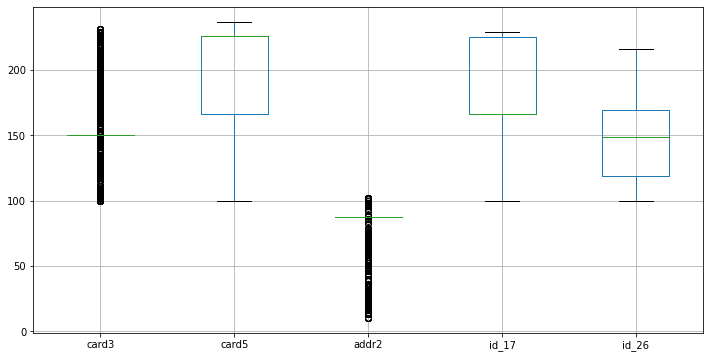

In [28]:
df[num_mid].boxplot(figsize=[12,6])

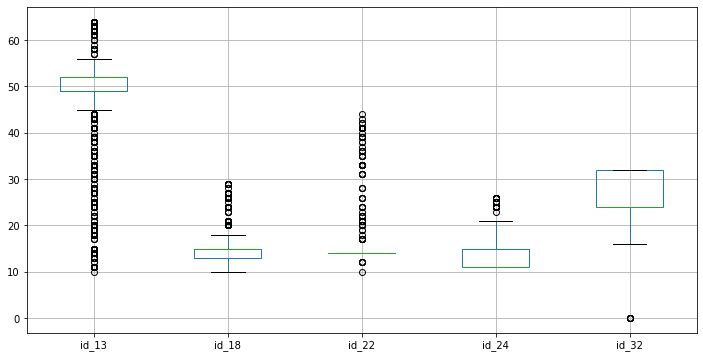

In [29]:
df[num_low].boxplot(figsize=[12,6])

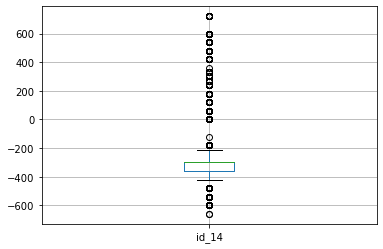

In [30]:
df[num_neg].boxplot()

#### Working Categorical Analysis

In [31]:
# doesn't provide any additional information about mobile vs. desktop
df.loc[df['DeviceType'].isna(), 'id_30'].unique()

array([nan], dtype=object)

In [32]:
# provides minimal additional information about mobile vs. desktop
print(len(df.loc[df['DeviceType'].isna(), 'id_31'].unique()))
df.loc[df['DeviceType'].isna(), 'id_31'].unique()

5


array([nan, 'ie 11.0 for desktop', 'chrome 62.0', 'ie 11.0 for tablet',
       'chrome 65.0'], dtype=object)

In [33]:
# creating new columns with just the OS name and number for potential use later
# may further encode this (e.g. label encode), but not at the moment since
# further engineering may benefit from labels
df['id_30'].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [34]:
import re
def strip_os_name(os_id):
    try:
        num_ix = re.search(r"\d", os_id)
        if (num_ix != None):
            os_name = os_id[:num_ix.start()-1]
        else:
            os_name = os_id
        return os_name
    except:
        return os_id

In [35]:
def strip_os_num(os_id):
    try:
        num_ix = re.search(r"\d", os_id)
        if (num_ix != None):
            os_name = os_id[num_ix.start():]
        else:
            os_name = np.nan
        return os_name
    except:
        return os_id

In [36]:
df['id_30_name'] = df['id_30'].apply(lambda x: strip_os_name(x))

In [37]:
df['id_30_num'] = df['id_30'].apply(lambda x: strip_os_num(x))

In [38]:
df['id_30_name'].unique()

array([nan, 'Android', 'iOS', 'Mac OS X', 'Windows', 'Linux', 'Mac',
       'Windows Vista', 'Windows XP', 'func', 'other'], dtype=object)

In [39]:
df['id_30_num'].unique()

array([nan, '7.0', '11.1.2', '10_11_6', '10', '11.0.3', '10_7_5',
       '10_12_6', '10_13_1', '11.1.0', '10_9_5', '7', '8.1', '10.3.3',
       '10.12', '10_10_5', '10_11_5', '9.3.5', '5.1.1', '7.1.1', '6.0',
       '10.3.1', '10.9', '11.1.1', '10.3.2', '11.0.2', '10.11', '8.0.0',
       '10.2.0', '10.2.1', '11.0.0', '10.10', '10_12_3', '10_12', '6.0.1',
       '10.13', '10_12_5', '10_8_5', '11.0.1', '10.0.2', '5.0.2',
       '11.2.0', '10.6', '8', '10_6_8', '10_11_4', '10_12_1', '10.1.1',
       '10_11_3', '10_12_4', '10_13_2', '4.4.2', '10_12_2', '5.0',
       '7.1.2', '8.1.0', '10_13_3', '11.2.1', '11.2.5', '11.2.2',
       '11.3.0', '11.2.6', '10_13_4', '10_13_5', '11.4.0', '11.3.1',
       '11.4.1'], dtype=object)

In [40]:
# make lowercase in conversion
id_31_bin_list = ['chrome', 'safari', 'firefox',
                  'opera', 'edge', 'samsung browser',
                  'ie', 'google', 'android']
def id_31_binning(item, bin_list, many=True):
    if item is np.nan:
        return item
    else:        
        for ibin in bin_list:
            if ibin in item.lower():
                return ibin
                break
        if many == True:
            return item
        else:
            return 'other'

In [41]:
df['id_31_bin_many'] = df['id_31'].apply(lambda x: id_31_binning(x, id_31_bin_list, many=True))

In [42]:
df['id_31_bin_many'].value_counts()

chrome               76059
safari               37281
ie                   10018
firefox               7017
edge                  6401
samsung browser       2028
opera                  449
other                  312
android                239
Samsung/SM-G532M       150
google                 146
Samsung/SM-G531H        52
Microsoft/Windows       25
silk                    19
samsung                 16
mobile                  11
ZTE/Blade                9
line                     6
maxthon                  6
comodo                   6
aol                      5
icedragon                5
Lanix/Ilium              3
palemoon                 2
waterfox                 2
puffin                   2
facebook                 2
Cherry                   1
Samsung/SCH              1
Inco/Minion              1
BLU/Dash                 1
iron                     1
Nokia/Lumia              1
chromium                 1
seamonkey                1
cyberfox                 1
LG/K-200                 1
M

In [43]:
df['id_31_bin_few'] = df['id_31'].apply(lambda x: id_31_binning(x, id_31_bin_list, many=False))

In [44]:
df['id_31_bin_few'].value_counts()

chrome             76059
safari             37281
ie                 10018
firefox             7017
edge                6401
samsung browser     2028
other                644
opera                449
android              239
google               146
Name: id_31_bin_few, dtype: int64

In [45]:
df['id_33'].value_counts()

1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
1600x900      3510
2048x1536     3482
1280x800      2149
2560x1600     2093
2560x1440     1865
2880x1800     1756
1280x1024     1743
1680x1050     1727
1136x640      1712
2436x1125     1484
1280x720      1318
1920x1200     1056
2001x1125     1020
1024x768       824
2220x1080      544
5120x2880      397
3360x2100      380
2732x2048      354
1366x767       335
3840x2160      263
855x480        250
2736x1824      241
1360x768       224
4096x2304      208
2224x1668      194
2220x1081      176
2160x1440      168
2961x1442      157
3200x1800      124
2560x1080      103
2562x1442       99
1600x1200       97
1280x768        90
1024x600        88
3000x2000       88
1280x1025       82
1152x864        79
3440x1440       76
801x480         64
2400x1350       62
2672x1440       58
960x540         58
1919x1079       57
1365x768        52
2048x1152       51
1919x1080       51
2960x1440       47
1536x864    

In [46]:
def resolution_prod(res):
    if res is np.nan:
        return res
    else:
        txt = res.split('x')
        txt = np.array(txt, dtype='int')
        return txt.sum()

In [47]:
def resolution_ratio(res, dec=1):
    if res is np.nan:
        return res
    else:
        txt = res.split('x')
        txt = np.array(txt, dtype='int')
        max_txt = txt.max()
        min_txt = txt.min()
        ratio = max_txt / min_txt
        return round(ratio, dec)

In [48]:
df['id_33_prod'] = df['id_33'].apply(lambda x: resolution_prod(x))
df['id_33_prod'].value_counts()

3000.0     16874
2134.0      8605
2084.0      6447
3450.0      4900
2340.0      4385
2500.0      3510
3584.0      3482
2080.0      2149
4160.0      2093
4000.0      1882
4680.0      1756
2304.0      1743
2730.0      1727
1776.0      1712
3561.0      1484
2000.0      1318
3120.0      1056
3126.0      1020
1792.0       824
3300.0       571
8000.0       397
2133.0       387
5460.0       380
4780.0       354
6000.0       263
1335.0       250
4560.0       243
2128.0       224
5000.0       212
6400.0       208
3892.0       194
3301.0       176
3600.0       171
4403.0       157
3640.0       103
4004.0        99
2800.0        97
2048.0        90
1624.0        88
2305.0        82
2016.0        79
4880.0        76
2999.0        68
1281.0        64
3750.0        62
3201.0        59
1500.0        58
4112.0        58
2998.0        58
3200.0        53
4400.0        48
2400.0        44
3002.0        42
2240.0        37
1872.0        32
2499.0        30
6240.0        29
4500.0        28
2303.0        

In [49]:
df['id_33_ratio'] = df['id_33'].apply(lambda x: resolution_ratio(x, dec=1))
df['id_33_ratio'].value_counts()

1.8    48938
1.6    13758
1.3     5141
1.2     1835
2.2     1485
2.1      945
1.5      615
1.7      253
2.4      193
1.9       77
2.0       33
1.4        5
3.6        2
5.3        2
3.2        1
Name: id_33_ratio, dtype: int64

In [50]:
def freq_encode(freq_col_list, df):
    freq_dicts = {}
    # gets frequency counts
    for cat in freq_col_list:
        temp_keys = df[cat].value_counts().index
        temp_values = df[cat].value_counts()
        temp_dict = dict(zip(temp_keys, temp_values))
        label_dicts.update({cat: temp_dict})
    # performs the encoding
    for key, value in freq_dicts.items():
        df[key] = df[key].map(value)

    return df   

In [51]:
# frequency encoding the resolutions to allow for categorizing if desired
# and also reduce dimensionality
id_33_cnts = df['id_33'].value_counts()
id_33_freq_dict = dict(zip(id_33_cnts.index, id_33_cnts))
df['id_33'] = df['id_33'].map(id_33_freq_dict)
df['id_33'].value_counts()

16874.0    16874
8605.0      8605
6447.0      6447
4900.0      4900
4384.0      4384
3510.0      3510
3482.0      3482
2149.0      2149
2093.0      2093
1865.0      1865
1756.0      1756
1743.0      1743
1727.0      1727
1712.0      1712
1484.0      1484
1318.0      1318
1056.0      1056
1020.0      1020
824.0        824
544.0        544
397.0        397
380.0        380
354.0        354
335.0        335
263.0        263
250.0        250
241.0        241
224.0        224
208.0        208
194.0        194
176.0        176
88.0         176
168.0        168
157.0        157
42.0         126
124.0        124
58.0         116
103.0        103
51.0         102
99.0          99
97.0          97
90.0          90
1.0           85
2.0           84
82.0          82
79.0          79
76.0          76
64.0          64
8.0           64
62.0          62
57.0          57
52.0          52
17.0          51
5.0           50
3.0           48
47.0          47
7.0           42
19.0          38
18.0          

In [52]:
# with so many DeviceInfo categories, I tried to find ways of quickly binning them
# I aslo didn't want to spend too much time because
# I'm a bit hesitant to use device types since they're time dependent as new devices are continually released
# so I may not use them in the model

# truncating the device info is a blunt way of binning different versions of the same device
df['DeviceInfo'].value_counts()
df['DeviceInfo_trunc'] = df['DeviceInfo']
# .fillna('unknown_device')
df['DeviceInfo_trunc'] = df['DeviceInfo_trunc'].apply(lambda x: x[:min(len(x),6)] if x is not np.nan else x)
print(len(df['DeviceInfo_trunc'].value_counts()))
df['DeviceInfo_trunc'].value_counts()

885


Window    47775
iOS De    19782
MacOS     12573
Triden     7440
SAMSUN     2692
          ...  
LAVA_A        1
SMART         1
MYA-L2        1
9002A         1
H3321         1
Name: DeviceInfo_trunc, Length: 885, dtype: int64

In [53]:
# now truncating without numerics
df['DeviceInfo_alpha_trunc'] = df['DeviceInfo']
# .fillna('unknown_device')
df['DeviceInfo_alpha_trunc'] = df['DeviceInfo_alpha_trunc'].apply(lambda x: ''.join([i for i in x.lower() if i.isalpha()])
                                                                            if x is not np.nan else x)
df['DeviceInfo_alpha_trunc'] = df['DeviceInfo_alpha_trunc'].apply(lambda x: x[:min(len(x),6)] if x is not np.nan else x)
print(len(df['DeviceInfo_alpha_trunc'].value_counts()))
df['DeviceInfo_alpha_trunc'].value_counts()

589


window    47775
iosdev    19782
macos     12573
triden     7440
rv         4385
samsun     2692
smgmbu     1208
smjmbu     1198
motogb     1158
smgfbu     1087
smgubu      833
huawei      719
smgvbu      647
lgkbui      595
motogp      585
smghbu      522
lghbui      510
xtbuil      459
fbuild      457
smafbu      357
alelbu      348
smtbui      336
lenovo      318
lgmbui      310
gbuild      293
smambu      290
bladev      288
htcdes      281
smnubu      281
lgxbui      272
motoeb      261
smjmnb      248
smgtbu      233
hisens      221
abuild      215
smjgmb      211
smahbu      203
hisftb      190
motoep      185
motozp      181
camlbu      172
smgpbu      171
ebuild      169
mssbui      155
pralxb      151
lgdnbu      151
lgdbui      149
vsbuil      135
iliuml      129
lgxgbu      129
trtlbu      122
tabuil      118
xt          116
zbuild      114
smgibu      114
motoxp      112
waslxb      112
pixelb      110
motocb      109
bladea      106
myalbu      103
linuxx      102
smjtbu  

In [54]:
# now I'm going to encode some that weren't already transformed into numbers
misc_cats = ['DeviceInfo', 'DeviceInfo_trunc', 'DeviceInfo_alpha_trunc',
             'id_30', 'id_30_name', 'id_30_num',
             'id_31', 'id_31_bin_many', 'id_31_bin_few',
             'id_33', 'id_33_prod', 'id_33_ratio']
misc_label_cats = ['DeviceInfo', 'DeviceInfo_trunc', 'DeviceInfo_alpha_trunc',
                   'id_30', 'id_30_name', 'id_30_num',
                   'id_31', 'id_31_bin_many', 'id_31_bin_few']

In [55]:
misc_label_dicts = {}
for cat in misc_label_cats:
    # gets unique values in reverse order by frequency
    temp_keys = list(df[cat].value_counts().index)[::-1]
    temp_values = range(len(temp_keys))
    temp_dict = dict(zip(temp_keys, temp_values))
    misc_label_dicts.update({cat: temp_dict})

In [56]:
for key, value in misc_label_dicts.items():
    df[key] = df[key].map(value)

In [57]:
df[misc_cats].head()

DeviceInfo  DeviceInfo_trunc  DeviceInfo_alpha_trunc  id_30  id_30_name  \
0         NaN               NaN                     NaN    NaN         NaN   
1         NaN               NaN                     NaN    NaN         NaN   
2         NaN               NaN                     NaN    NaN         NaN   
3         NaN               NaN                     NaN    NaN         NaN   
4      1257.0             880.0                   583.0   70.0         6.0   

   id_30_num  id_31  id_31_bin_many  id_31_bin_few  id_33  id_33_prod  \
0        NaN    NaN             NaN            NaN    NaN         NaN   
1        NaN    NaN             NaN            NaN    NaN         NaN   
2        NaN    NaN             NaN            NaN    NaN         NaN   
3        NaN    NaN             NaN            NaN    NaN         NaN   
4       61.0  108.0            32.0            4.0  544.0      3300.0   

   id_33_ratio  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          2.1

In [58]:
df[binary_cats].head()

m1   m2   m3   m5   m6   m7   m8   m9  DeviceType  id_12  id_16  id_27  \
0  1.0  1.0  1.0  0.0  1.0  NaN  NaN  NaN         NaN    NaN    NaN    NaN   
1  NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN         NaN    NaN    NaN    NaN   
2  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0         NaN    NaN    NaN    NaN   
3  NaN  NaN  NaN  1.0  0.0  NaN  NaN  NaN         NaN    NaN    NaN    NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         0.0    0.0    0.0    NaN   

   id_28  id_29  id_35  id_36  id_37  id_38  transactionamt_long_dec  
0    NaN    NaN    NaN    NaN    NaN    NaN                        0  
1    NaN    NaN    NaN    NaN    NaN    NaN                        0  
2    NaN    NaN    NaN    NaN    NaN    NaN                        0  
3    NaN    NaN    NaN    NaN    NaN    NaN                        0  
4    0.0    0.0    1.0    0.0    1.0    1.0                        0

In [59]:
df[labeling_cats].head()

productcd  card4  card6   m4  id_15  id_23  p_emaildomain  r_emaildomain
0          4    0.0    2.0  1.0    NaN    NaN            NaN            NaN
1          4    2.0    2.0  2.0    NaN    NaN           58.0            NaN
2          4    3.0    3.0  2.0    NaN    NaN           51.0            NaN
3          4    2.0    3.0  2.0    NaN    NaN           57.0            NaN
4          1    2.0    2.0  NaN    1.0    NaN           58.0            NaN

In [60]:
df[num_cats].head()

card1  card2  card3  card5  addr1  addr2  id_13  id_14  id_17  id_18  \
0  13926    NaN  150.0  142.0  315.0   87.0    NaN    NaN    NaN    NaN   
1   2755  404.0  150.0  102.0  325.0   87.0    NaN    NaN    NaN    NaN   
2   4663  490.0  150.0  166.0  330.0   87.0    NaN    NaN    NaN    NaN   
3  18132  567.0  150.0  117.0  476.0   87.0    NaN    NaN    NaN    NaN   
4   4497  514.0  150.0  102.0  420.0   87.0    NaN -480.0  166.0    NaN   

   id_19  id_20  id_21  id_22  id_24  id_25  id_26  id_32  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4  542.0  144.0    NaN    NaN    NaN    NaN    NaN   32.0

In [61]:
all_cats = binary_cats + labeling_cats + num_cats + misc_cats
np.array(all_cats)

array(['m1', 'm2', 'm3', 'm5', 'm6', 'm7', 'm8', 'm9', 'DeviceType',
       'id_12', 'id_16', 'id_27', 'id_28', 'id_29', 'id_35', 'id_36',
       'id_37', 'id_38', 'transactionamt_long_dec', 'productcd', 'card4',
       'card6', 'm4', 'id_15', 'id_23', 'p_emaildomain', 'r_emaildomain',
       'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'id_13',
       'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_24', 'id_25', 'id_26', 'id_32', 'DeviceInfo',
       'DeviceInfo_trunc', 'DeviceInfo_alpha_trunc', 'id_30',
       'id_30_name', 'id_30_num', 'id_31', 'id_31_bin_many',
       'id_31_bin_few', 'id_33', 'id_33_prod', 'id_33_ratio'],
      dtype='<U23')

In [62]:
# output_loc = '../data/interim/'
# file_name = 'ngv_modeling.csv'
# df.to_csv(output_loc+file_name)

### Exploratory Analysis
Now that we have the data in the correct shape, do the following for all variables, but pay special attention to the target variable. Note that some datasets may be very large, and conventional data exploration methods may be inconvenient. You might want to utilize plotting inside a for loop (hint: you can use the input() function to pause the loop and wait for you to press enter). Or, you may want to save all plots as images so you can quickly glance over their thumbnails in a folder.

#### Inital Column Groupings

In [343]:
# dropping the column with all NaNs

# added to data_cleaning.py

# df.drop(['v340'], axis=1, inplace=True)

In [344]:
all_cols = list(df.columns)
non_cats = [i for i in all_cols if i not in all_cats]

In [345]:
index_col = ['transactionid']
target_col = ['isfraud']
trans_cols = [i for i in non_cats if (i[0] == 't') and (i[-1] != 'd')]
dist_cols = [i for i in non_cats if i[0:2] == 'di']
c_cols = [i for i in non_cats if i[0] == 'c']
d_cols = [i for i in non_cats if (i[0] == 'd') and (i[1] != 'i')]
v_cols = [i for i in non_cats if i[0] == 'v']
id_cols = [i for i in non_cats if i[0:2] == 'id']

In [346]:
# list of lists of groupings in case i need to iterate
non_cat_v_list = [trans_cols, dist_cols, c_cols, d_cols, id_cols]

In [347]:
for x in non_cat_v_list:
    print(x)

['transactiondt', 'transactionamt']
['dist1', 'dist2']
['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14']
['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15']
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_34']


In [348]:
v_nulls = null_counts(df[v_cols])
# binning based on nulls for further analysis
v_null_vcnts = v_nulls['null_fraction'].value_counts()
v_null_bins = list(v_null_vcnts.index)
print(len(v_null_bins))
v_null_bins

15


[0.7791343516103905,
 0.0005317167338368274,
 2.0320384732617603e-05,
 0.763553696616656,
 0.1288193856470349,
 0.13055169844549055,
 0.15098723202492634,
 0.7632353439225116,
 0.8612371727571375,
 0.2861262573238053,
 0.8605496664070174,
 0.7605310393876791,
 0.47293494090154775,
 0.8612270125647712,
 0.0021488806854743116]

In [349]:
v_cols_list = []
for vbin in v_null_bins:
    vcols = list(v_nulls.loc[v_nulls['null_fraction'] == vbin].index)
    v_cols_list.append(vcols)

In [350]:
# creating a list of all the groupings in case i need to iterate them
non_cat_list = non_cat_v_list + v_cols_list
print(len(non_cat_list))
print(non_cat_list)

20
[['transactiondt', 'transactionamt'], ['dist1', 'dist2'], ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14'], ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15'], ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_34'], ['v263', 'v265', 'v217', 'v264', 'v219', 'v266', 'v267', 'v268', 'v269', 'v273', 'v274', 'v275', 'v276', 'v277', 'v218', 'v278', 'v223', 'v248', 'v237', 'v224', 'v241', 'v242', 'v243', 'v244', 'v246', 'v247', 'v249', 'v235', 'v252', 'v253', 'v254', 'v257', 'v258', 'v260', 'v261', 'v262', 'v236', 'v240', 'v230', 'v231', 'v233', 'v228', 'v226', 'v225', 'v229', 'v232'], ['v118', 'v102', 'v101', 'v100', 'v117', 'v98', 'v97', 'v96', 'v95', 'v127', 'v128', 'v129', 'v130', 'v131', 'v132', 'v133', 'v134', 'v135', 'v99', 'v137', 'v104', 'v103', 'v136', 'v126', 'v125', 'v124', 'v108', 'v109', 'v105', 'v107', 'v110', 'v111', 'v106', 'v112', 'v

### Correlation Based Feature Reduction

In [351]:
import pandas as pd
def corr_var_df(corr_df, row_list=False):
    if row_list == False:
        row_list = [True for x in range(corr_df.shape[0])]
    corr_temp = corr_df.iloc[row_list].copy()
    # need to move index to a column to allow for .apply() to access column name for variance calculation
    corr_temp.reset_index(inplace=True)
    corr_temp.rename(columns={'index': 'feature'}, inplace=True)
    corr_temp['variance'] = corr_temp['feature'].apply(lambda x: (df[x]/df[x].mean()).var())
    corr_temp.sort_values('variance', ascending=False, inplace=True)
    corr_temp.set_index('feature', inplace=True)
    return corr_temp

In [352]:
def reduce_feature_by_corr(df, feats, orig_feats, corr_filter = 0.9, keep_list = []):
    # excluding anything already determined to be kept
    try_feats = list(set(feats).difference(set(keep_list)))
    corr_temp = df[try_feats].copy()
    corr_temp = corr_temp.corr()
    row_list = []
    for row in corr_temp.itertuples():
        bool_temp = [1 if (x > corr_filter) and (x < 1) else 0 for x in row[1:]]
        bool_temp = min(1, sum(bool_temp))
        bool_temp = bool(bool_temp)
        row_list.append(bool_temp)
        if bool_temp == False:
            keep_list.append(row[0])
    # controlling for duplicates
    keep_list = list(set(keep_list))  
    # if no more high correlations then return the results
    if sum(row_list) == 0:
        corr_temp = df[keep_list].corr()
        drop_list = list(set(orig_feats).difference(set(keep_list)))
        return keep_list, drop_list, corr_var_df(corr_temp)
    else:        
        # drop the feature with lowest variance and run again
        corr_temp = corr_var_df(corr_temp, row_list)
        corr_temp = corr_temp.iloc[0:-1]
        next_feats = corr_temp.index.to_list()
        return reduce_feature_by_corr(df, next_feats, orig_feats, corr_filter, keep_list)

In [353]:
v_keeps, v_drops, v_corr_dfs = [], [], []
for x in range(5,20):
    temp_keeps, temp_drops, temp_corr_df = reduce_feature_by_corr(df, non_cat_list[x], non_cat_list[x], 0.95)
    v_keeps += temp_keeps
    v_drops += temp_drops
    v_corr_dfs.append(temp_corr_df)

In [357]:
v_keeps = list(set(v_keeps))
print(len(v_keeps))
v_keeps

247


['v209',
 'v253',
 'v7',
 'v295',
 'v211',
 'v83',
 'v166',
 'v129',
 'v43',
 'v50',
 'v238',
 'v252',
 'v120',
 'v114',
 'v105',
 'v20',
 'v79',
 'v188',
 'v328',
 'v338',
 'v73',
 'v38',
 'v76',
 'v84',
 'v313',
 'v19',
 'v301',
 'v310',
 'v30',
 'v184',
 'v140',
 'v12',
 'v222',
 'v18',
 'v208',
 'v6',
 'v46',
 'v100',
 'v304',
 'v40',
 'v305',
 'v25',
 'v336',
 'v130',
 'v147',
 'v165',
 'v278',
 'v215',
 'v94',
 'v244',
 'v55',
 'v298',
 'v290',
 'v121',
 'v118',
 'v284',
 'v91',
 'v141',
 'v39',
 'v37',
 'v335',
 'v62',
 'v257',
 'v300',
 'v282',
 'v293',
 'v274',
 'v61',
 'v89',
 'v334',
 'v312',
 'v247',
 'v122',
 'v115',
 'v26',
 'v189',
 'v110',
 'v246',
 'v32',
 'v49',
 'v24',
 'v65',
 'v169',
 'v14',
 'v323',
 'v138',
 'v223',
 'v86',
 'v320',
 'v322',
 'v287',
 'v240',
 'v281',
 'v180',
 'v160',
 'v216',
 'v60',
 'v228',
 'v75',
 'v236',
 'v8',
 'v199',
 'v2',
 'v289',
 'v23',
 'v339',
 'v187',
 'v327',
 'v98',
 'v309',
 'v52',
 'v87',
 'v288',
 'v170',
 'v11',
 'v101',
 '

In [356]:
v_drops = list(set(v_drops))
print(len(v_drops))
v_drops

92


['v333',
 'v266',
 'v213',
 'v48',
 'v153',
 'v332',
 'v21',
 'v221',
 'v74',
 'v177',
 'v148',
 'v143',
 'v331',
 'v92',
 'v225',
 'v271',
 'v134',
 'v69',
 'v294',
 'v34',
 'v149',
 'v316',
 'v42',
 'v162',
 'v144',
 'v157',
 'v219',
 'v255',
 'v204',
 'v193',
 'v80',
 'v168',
 'v33',
 'v178',
 'v308',
 'v249',
 'v27',
 'v329',
 'v15',
 'v102',
 'v127',
 'v132',
 'v17',
 'v232',
 'v330',
 'v57',
 'v10',
 'v202',
 'v167',
 'v212',
 'v250',
 'v317',
 'v280',
 'v248',
 'v292',
 'v90',
 'v192',
 'v299',
 'v318',
 'v126',
 'v51',
 'v307',
 'v279',
 'v145',
 'v106',
 'v190',
 'v203',
 'v128',
 'v29',
 'v155',
 'v150',
 'v233',
 'v306',
 'v95',
 'v242',
 'v96',
 'v254',
 'v97',
 'v272',
 'v133',
 'v151',
 'v179',
 'v231',
 'v31',
 'v71',
 'v218',
 'v191',
 'v217',
 'v59',
 'v237',
 'v302',
 'v324']

In [327]:
test_keeps, test_drops, test_corr_df = reduce_feature_by_corr(df, non_cat_list[19], non_cat_list[19], 0.95)

In [328]:
keep = ['v152', 'v164', 'v165', 'v166', 'v160', 'v159']

In [329]:
test_keeps

['v152', 'v164', 'v165', 'v166', 'v160', 'v159']

In [330]:
test_drops

['v143', 'v150', 'v151', 'v144', 'v145']

In [332]:
test_corr_df

v152      v164      v165      v166      v160      v159   variance
feature                                                                       
v164     0.057062  1.000000  0.871302  0.141563  0.064732  0.064115  47.480134
v165     0.397608  0.871302  1.000000  0.387504  0.437116  0.407693  13.478015
v166     0.608280  0.141563  0.387504  1.000000  0.638792  0.656757  11.985060
v159     0.860805  0.064115  0.407693  0.656757  0.868073  1.000000   9.441152
v160     0.890901  0.064732  0.437116  0.638792  1.000000  0.868073   8.964193
v152     1.000000  0.057062  0.397608  0.608280  0.890901  0.860805   5.221586

In [320]:
temp_list = non_cat_list[19]
# temp_list = set(non_cat_list[19]).difference(set(drop_19))
# temp_list = keep
# corr_list[19] = df[temp_list].corr()
# corr_temp = corr_list[19
corr_temp = df[temp_list].corr()
row_list = []
keep_list = []
for row in corr_temp.itertuples():
    bool_temp = [1 if (x > 0.9) and (x < 1) else 0 for x in row[1:]]
    bool_temp = min(1, sum(bool_temp))
    bool_temp = bool(bool_temp)
    row_list.append(bool_temp)
    if bool_temp == False:
        keep_list.append(row[0])
corr_list = []  
for row in corr_temp.iterrows():
    bool_temp = row[1].loc[row[1] > 0.9]
    corr_list.append(bool_temp.index.to_list())
    
corr_temp = corr_temp.iloc[row_list].copy()
# corr_temp = corr_temp.applymap(lambda x: x*100 if (x > .9) else np.nan)
corr_temp.reset_index(inplace=True)
corr_temp.rename(columns={'index': 'feature'}, inplace=True)
corr_temp['variance'] = corr_temp['feature'].apply(lambda x: (df[x]/df[x].mean()).var())
corr_temp.sort_values('variance', ascending=False, inplace=True)

corr_temp.set_index('feature', inplace=True)
# drop_col = corr_temp.index[-1]
# print(drop_col)
corr_temp
# corr_temp = corr_temp.loc[corr_temp.index.isin(temp_list)]

v160      v164      v165      v152      v159      v151      v150  \
feature                                                                         
v164     0.064732  1.000000  0.871302  0.057062  0.064115  0.061724  0.065370   
v143     0.091512  0.996551  0.879189  0.085321  0.100540  0.094344  0.098937   
v159     0.868073  0.064115  0.407693  0.860805  1.000000  0.962705  0.968534   
v160     1.000000  0.064732  0.437116  0.890901  0.868073  0.910238  0.942301   
v150     0.942301  0.065370  0.431423  0.887184  0.968534  0.972867  1.000000   
v145     0.961669  0.121035  0.492431  0.876682  0.917704  0.942457  0.981799   
v144     0.893884  0.171140  0.517073  0.837413  0.938407  0.921604  0.958449   
v151     0.910238  0.061724  0.413988  0.938174  0.962705  1.000000  0.972867   
v152     0.890901  0.057062  0.397608  1.000000  0.860805  0.938174  0.887184   

             v145      v144      v143      v166   variance  
feature                                                     
v164     0.121035  0.171140  0.996551  0.141563  47.480134  
v143     0.149412  0.201411  1.000000  0.157203  43.320302  
v159     0.917704  0.938407  0.100540  0.656757   9.441152  
v160     0.961669  0.893884  0.091512  0.638792   8.964193  
v150     0.981799  0.958449  0.098937  0.673791   8.930599  
v145     1.000000  0.952649  0.149412  0.676667   8.474204  
v144     0.952649  1.000000  0.201411  0.718336   7.994594  
v151     0.942457  0.921604  0.094344  0.654035   5.559578  
v152     0.876682  0.837413  0.085321  0.608280   5.221586

#### Statistical Description
Run the describe() function to create a table of summary stats. Note anything interesting, relevant, etc.

In [70]:
df[non_cat_list[0]+non_cat_list[1]].describe()

transactiondt  transactionamt          dist1         dist2
count   5.905400e+05   590540.000000  238269.000000  37627.000000
mean    7.372311e+06      135.027176     118.502180    231.855423
std     4.617224e+06      239.162522     371.872026    529.053494
min     8.640000e+04        0.251000       0.000000      0.000000
25%     3.027058e+06       43.321000       3.000000      7.000000
50%     7.306528e+06       68.769000       8.000000     37.000000
75%     1.124662e+07      125.000000      24.000000    206.000000
max     1.581113e+07    31937.391000   10286.000000  11623.000000

In [71]:
df[non_cat_list[2]].describe()

c1             c2             c3             c4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  c5             c6             c7             c8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  c9            c10            c11            c12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 c13            c14  
count  590540.000000  590540.000000  
mean       32.539918       8.295215  
std       129.364844      49.544262  
min         0.000000       0.000000  
25%         1.000000       1.000000  
50%         3.000000       1.000000  
75%        12.000000       2.000000  
max      2918.000000    1429.000000

In [72]:
df[non_cat_list[3]].describe()

d1             d2             d3             d4  \
count  589271.000000  309743.000000  327662.000000  421618.000000   
mean       94.347568     169.563231      28.343348     140.002441   
std       157.660387     177.315865      62.384721     191.096774   
min         0.000000       0.000000       0.000000    -122.000000   
25%         0.000000      26.000000       1.000000       0.000000   
50%         3.000000      97.000000       8.000000      26.000000   
75%       122.000000     276.000000      27.000000     253.000000   
max       640.000000     640.000000     819.000000     869.000000   

                  d5            d6            d7            d8            d9  \
count  280699.000000  73187.000000  38917.000000  74926.000000  74926.000000   
mean       42.335965     69.805717     41.638950    146.058108      0.561057   
std        89.000144    143.669253     99.743264    231.663840      0.316880   
min         0.000000    -83.000000      0.000000      0.000000      0.000000   
25%         1.000000      0.000000      0.000000      0.958333      0.208333   
50%        10.000000      0.000000      0.000000     37.875000      0.666666   
75%        32.000000     40.000000     17.000000    187.958328      0.833333   
max       819.000000    873.000000    843.000000   1707.791626      0.958333   

                 d10            d11           d12           d13           d14  \
count  514518.000000  311253.000000  64717.000000  61952.000000  62187.000000   
mean      123.982137     146.621465     54.037533     17.901295     57.724444   
std       182.615225     186.042622    124.274558     67.614425    136.312450   
min         0.000000     -53.000000    -83.000000      0.000000   -193.000000   
25%         0.000000       0.000000      0.000000      0.000000      0.000000   
50%        15.000000      43.000000      0.000000      0.000000      0.000000   
75%       197.000000     274.000000     13.000000      0.000000      2.000000   
max       876.000000     670.000000    648.000000    847.000000    878.000000   

                 d15  
count  501427.000000  
mean      163.744579  
std       202.726660  
min       -83.000000  
25%         0.000000  
50%        52.000000  
75%       314.000000  
max       879.000000

In [73]:
df[non_cat_list[4]].describe()

id_01          id_02         id_03         id_04  \
count  144233.000000  140872.000000  66324.000000  66324.000000   
mean      -10.170502  174716.584708      0.060189     -0.058938   
std        14.347949  159651.816856      0.598231      0.701015   
min      -100.000000       1.000000    -13.000000    -28.000000   
25%       -10.000000   67992.000000      0.000000      0.000000   
50%        -5.000000  125800.500000      0.000000      0.000000   
75%        -5.000000  228749.000000      0.000000      0.000000   
max         0.000000  999595.000000     10.000000      0.000000   

               id_05          id_06        id_07        id_08         id_09  \
count  136865.000000  136865.000000  5155.000000  5155.000000  74926.000000   
mean        1.615585      -6.698710    13.285354   -38.600388      0.091023   
std         5.249856      16.491104    11.384207    26.084899      0.983842   
min       -72.000000    -100.000000   -46.000000  -100.000000    -36.000000   
25%         0.000000      -6.000000     5.000000   -48.000000      0.000000   
50%         0.000000       0.000000    14.000000   -34.000000      0.000000   
75%         1.000000       0.000000    22.000000   -23.000000      0.000000   
max        52.000000       0.000000    61.000000     0.000000     25.000000   

              id_10          id_11         id_34  
count  74926.000000  140978.000000  77805.000000  
mean      -0.301124      99.745325      2.765889  
std        2.789446       1.127602      0.436124  
min     -100.000000      90.000000      0.000000  
25%        0.000000     100.000000      3.000000  
50%        0.000000     100.000000      3.000000  
75%        0.000000     100.000000      3.000000  
max        0.000000     100.000000      3.000000

In [74]:
df[non_cat_list[5]].describe()

v217           v265           v266           v267  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean        1.054619     153.520534       9.167839      36.525103   
std         9.547354    1605.512276     208.038863     644.878586   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000      20.897525       0.000000       0.000000   
max       303.000000  153600.000000   55125.000000   55125.000000   

                v262           v268           v269           v273  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean        1.013279      18.813407       5.997508      73.825549   
std         0.625455     311.280181     207.317539     935.187927   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        20.000000   55125.000000   55125.000000   51200.000000   

                v274           v275           v276           v277  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean      107.151636      88.899939      31.797277      51.956645   
std      1258.734139    1072.883139     615.659714     732.145368   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     66000.000000   51200.000000  104060.000000  104060.000000   

                v278           v264           v263           v218  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean       42.328228     201.657617     117.390676       1.725784   
std       660.611820    2284.827492    1294.851543      13.919876   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000      33.593498       0.000000       1.000000   
max    104060.000000  153600.000000  153600.000000     400.000000   

                v226           v241           v237           v236  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean        0.247612       1.000238       0.253500       0.307667   
std         2.756449       0.022663       1.716634       2.152332   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max       242.000000       5.000000      39.000000      45.000000   

                v242           v235           v233           v243  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean        1.113463       0.184106       0.908388       1.178387   
std         0.660110       0.902639      10.149884       1.398953   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max        20.000000      23.000000     332.000000      57.000000   

                v244           v232           v231           v230  \
count  130430.000000  130430.000000  130430.000000  130430.000000   
mean        1.118562       1.005597       0.765506       1.465476   
std         0.698807      10.460253       8.877119       2.122783   
min     

In [75]:
df[non_cat_list[6]].describe()

v119           v102           v101           v100  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        1.000729       1.827229       0.889249       0.273504   
std         0.036392      35.928456      20.582571       0.947176   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         3.000000    1285.000000     869.000000      28.000000   

                v118            v98            v97           v96  \
count  590226.000000  590226.000000  590226.000000  590226.00000   
mean        1.001474       0.061985       1.718933       3.00519   
std         0.041011       0.284995      27.700449      40.23949   
min         0.000000       0.000000       0.000000       0.00000   
25%         1.000000       0.000000       0.000000       0.00000   
50%         1.000000       0.000000       0.000000       0.00000   
75%         1.000000       0.000000       0.000000       1.00000   
max         3.000000      12.000000     976.000000    1410.00000   

                 v95           v126           v127           v128  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        1.038019     129.979417     336.611559     204.094038   
std        21.034304    2346.951681    4238.666949    3010.258774   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000     107.949997       0.000000   
max       880.000000  160000.000000  160000.000000  160000.000000   

                v129           v130           v131           v132  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        8.768944      92.165849      31.133302     103.513188   
std       113.832828     315.960485     161.161258    2266.106140   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000      59.000000       0.000000       0.000000   
max     55125.000000   55125.000000   55125.000000   93736.000000   

                v133           v134           v135            v99  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean      204.889160     145.972328      17.250132       0.894986   
std      3796.316755    2772.986817     293.847563       2.722552   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max    133915.000000   98476.000000   90750.000000      88.000000   

                v137           v104           v111           v106  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean       26.365090       0.085433       1.002563       0.164584   
std       348.332714       0.648718       0.070830       1.825665   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max     90750.000000      15.000000       9.000000      55.000000   

                v107           v125           v124           v123  \
count  590226.000000  590226.000000  590226.000000  590226.000000   
mean        0.999580       1.050415       1.092975       1.031120   
std         0.020494       0.280037       0.374103       0.228134   
min         0.000

In [76]:
df[non_cat_list[7]].describe()

v321           v320           v319           v318  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean       28.326584      42.073133      18.372476     162.153398   
std       382.053171     473.499307     332.304848    2793.343636   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max    104060.000000  104060.000000  104060.000000   98476.000000   

                v317           v316           v287           v286  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean      247.606741     109.818544       0.358579       0.031492   
std      3980.042828    2270.033202       1.078995       0.190939   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max    134021.000000   93736.000000      31.000000       8.000000   

                v312           v290           v291           v292  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean       39.173910       1.103011       1.659811       1.239916   
std       172.128339       0.768897      16.252538       3.775050   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       1.000000       1.000000       1.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max     55125.000000      67.000000    1055.000000     323.000000   

                v293           v294           v295           v285  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean        0.942599       2.313863       1.433424       1.167660   
std        20.588816      39.526468      25.962948       3.282454   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max       869.000000    1286.000000     928.000000      95.000000   

                v297           v298           v284           v299  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean        0.089034       0.298829       0.088543       0.171655   
std         0.628352       3.175062       0.338424       1.724218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        12.000000      93.000000      12.000000      49.000000   

                v280           v279           v302           v303  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean        1.967082       1.123061       0.251761       0.283140   
std        27.851780      21.021950       0.481889       0.623608   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max       975.000000     880.000000      16.000000      20.000000   

                v304           v305           v306           v307  \
count  590528.000000  590528.000000  590528.000000  590528.000000   
mean        0.264208       1.000007     139.748713     408.682375   
std         0.528238       0.002603    2348.849634    4391.992977   
min     

In [77]:
df[non_cat_list[8]].describe()

v168           v173           v167           v178  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        5.859501       0.055231       3.929514       6.649283   
std        54.032468       0.264439      42.200980      69.447364   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max       964.000000       7.000000     872.000000    1235.000000   

                v176           v177           v172           v186  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        1.376979       3.529245       0.132012       1.148799   
std         1.829420      41.310622       0.924894       1.223529   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max        48.000000     861.000000      31.000000      38.000000   

                v179           v202           v215           v214  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        4.869012     444.147142     133.208217      38.437547   
std        50.489426    4683.828419    1040.453748     571.834283   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       920.000000  104060.000000  104060.000000  104060.000000   

                v213           v212           v211           v207  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean      536.302802     765.988339     385.137037      72.284098   
std      5471.664736    7496.120737    4541.837915     925.676660   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     97628.000000  129006.000000   92888.000000   55125.000000   

                v206           v205           v204           v199  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        6.189360      18.060417     686.956931       1.270749   
std       191.474014     266.545451    6048.980716       1.671863   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000      20.000000       1.000000   
max     55125.000000   55125.000000  104060.000000      45.000000   

                v181           v196           v193           v192  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        0.253332       1.084580       1.149845       1.237361   
std         1.248974       1.105834       1.714792       2.635961   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       1.000000       1.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max        24.000000      38.000000      37.000000      44.000000   

                v191           v190           v187           v216  \
count  139631.000000  139631.000000  139631.000000  139631.000000   
mean        1.058984       1.213083       1.843752      71.107143   
std         0.677527       1.480318       9.884390     680.267625   
min     

In [78]:
df[non_cat_list[9]].describe()

v24            v25            v26            v27  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        1.058097       0.977660       0.988040       0.000776   
std         0.305485       0.185245       0.209302       0.028596   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max        13.000000       7.000000      13.000000       4.000000   

                 v22            v29            v30            v31  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.132292       0.387840       0.406436       0.140761   
std         0.359415       0.510652       0.554311       0.355793   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max         8.000000       5.000000       9.000000       7.000000   

                 v32            v23            v12            v21  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.142417       1.034791       0.559711       0.129684   
std         0.368278       0.247681       0.510533       0.339060   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       1.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max        15.000000      13.000000       3.000000       5.000000   

                 v20            v19            v18            v17  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.847843       0.816371       0.135363       0.134040   
std         0.459451       0.425512       0.371763       0.364456   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max        15.000000       7.000000      15.000000      15.000000   

                 v16            v15            v14            v13  \
count  514467.000000  514467.000000  514467.000000  514467.000000   
mean        0.123460       0.122342       0.999500       0.599166   
std         0.342841       0.332422       0.022345       0.532185   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max        15.000000       7.000000       1.000000       6.000000   

               v12.1            v34            v33            v28  
count  514467.000000  514467.000000  514467.000000  514467.000000  
mean        0.559711       0.139154       0.130693       0.000830  
std         0.510533       0.357549       0.340900       0.031133  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       0.000000       0.000000  
75%         1.000000       0.000000       0.000000       0.000000  
max         3.000000      13.000000       7.000000       4.000000

In [79]:
df[non_cat_list[10]].describe()

v74            v61            v53            v54  \
count  513444.000000  513444.000000  513444.000000  513444.000000   
mean        0.152147       0.829785       0.577586       0.619982   
std         0.393274       0.436617       0.511571       0.534635   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         8.000000       6.000000       5.000000       6.000000   

                 v55            v56            v57            v58  \
count  513444.000000  513444.000000  513444.000000  513444.000000   
mean        1.067670       1.120979       0.128312       0.132453   
std         0.391364       0.661129       0.349094       0.372907   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max        17.000000      51.000000       6.000000      10.000000   

                 v59            v73            v60            v70  \
count  513444.000000  513444.000000  513444.000000  513444.000000   
mean        0.134433       0.139982       0.142537       0.407924   
std         0.379291       0.367098       0.418230       0.554499   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max        16.000000       7.000000      16.000000       6.000000   

                 v72            v62            v63            v64  \
count  513444.000000  513444.000000  513444.000000  513444.000000   
mean        0.145124       0.867563       0.130743       0.141825   
std         0.389212       0.483803       0.355262       0.406157   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max        10.000000      10.000000       7.000000       7.000000   

                 v65            v66            v67            v68  \
count  513444.000000  513444.000000  513444.000000  513444.000000   
mean        0.999663       0.981038       0.998121       0.000534   
std         0.018353       0.216235       0.245912       0.023760   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max         1.000000       7.000000       8.000000       2.000000   

                 v69            v71  
count  513444.000000  513444.000000  
mean        0.390200       0.140639  
std         0.513696       0.364303  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         1.000000       0.000000  
max         5.000000       6.000000

In [80]:
df[non_cat_list[11]].describe()

v141          v149        v157.1          v157          v156  \
count  81945.000000  81945.000000  81945.000000  81945.000000  81945.000000   
mean       0.037696      0.775313      0.817573      0.817573      0.777485   
std        0.215133      0.628191      0.682016      0.682016      0.647209   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        0.000000      1.000000      1.000000      1.000000      1.000000   
max        5.000000     20.000000     24.000000     24.000000     24.000000   

               v155          v154          v153          v142          v161  \
count  81945.000000  81945.000000  81945.000000  81945.000000  81945.000000   
mean       0.767381      0.757423      0.753200      0.048581      4.843938   
std        0.602678      0.546907      0.532649      0.313888     58.929757   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       24.000000     18.000000     18.000000      9.000000   3300.000000   

               v162          v148          v147          v146          v163  \
count  81945.000000  81945.000000  81945.000000  81945.000000  81945.000000   
mean       6.594661      0.765001      0.168601      0.156276      5.505955   
std       69.195180      0.581425      0.750497      0.682328     63.077887   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max     3300.000000     20.000000     26.000000     24.000000   3300.000000   

               v138          v139        v139.1          v140          v158  
count  81945.000000  81945.000000  81945.000000  81945.000000  81945.000000  
mean       0.036439      1.073915      1.073915      1.125267      0.833461  
std        0.428490      1.333924      1.333924      1.467850      0.734336  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      1.000000      1.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000      1.000000      1.000000  
max       22.000000     33.000000     33.000000     33.000000     24.000000

In [81]:
df[non_cat_list[12]].describe()

v91            v80            v90            v94  \
count  501376.000000  501376.000000  501376.000000  501376.000000   
mean        0.420461       0.143954       0.401862       0.137007   
std         0.561865       0.409932       0.516153       0.343878   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         6.000000      19.000000       5.000000       2.000000   

                 v92            v75            v76            v77  \
count  501376.000000  501376.000000  501376.000000  501376.000000   
mean        0.150322       0.544278       0.587557       1.086893   
std         0.375682       0.514318       0.538230       0.532958   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         7.000000       4.000000       6.000000      30.000000   

                 v78            v79            v93            v81  \
count  501376.000000  501376.000000  501376.000000  501376.000000   
mean        1.144462       0.136867       0.154812       0.152696   
std         0.781474       0.379904       0.402314       0.452298   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        31.000000       7.000000       7.000000      19.000000   

                 v86            v89            v82            v88  \
count  501376.000000  501376.000000  501376.000000  501376.000000   
mean        1.064885       0.000902       0.844610       0.999246   
std         0.419807       0.031943       0.422529       0.027447   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max        30.000000       2.000000       7.000000       1.000000   

                 v87            v83            v84            v85  
count  501376.000000  501376.000000  501376.000000  501376.000000  
mean        1.099456       0.881965       0.137145       0.149788  
std         0.511281       0.470757       0.361875       0.419445  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       1.000000       0.000000       0.000000  
50%         1.000000       1.000000       0.000000       0.000000  
75%         1.000000       1.000000       0.000000       0.000000  
max        30.000000       7.000000       7.000000       7.000000

In [82]:
df[non_cat_list[13]].describe()

v194           v170           v195           v209  \
count  139819.000000  139819.000000  139819.000000  139819.000000   
mean        0.945773       1.436779       0.954227      35.001872   
std         0.304158       1.751143       0.376420     250.800822   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max         7.000000      48.000000      16.000000    8050.000000   

                v208           v201           v200           v198  \
count  139819.000000  139819.000000  139819.000000  139819.000000   
mean        8.888193       1.159106       1.119977       0.961951   
std        59.047125       1.418618       1.253853       0.493065   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       1.000000       1.000000   
50%         0.000000       1.000000       1.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max      3300.000000      55.000000      45.000000      21.000000   

                v197           v189           v171           v188  \
count  139819.000000  139819.000000  139819.000000  139819.000000   
mean        0.949385       1.038314       1.690908       1.014755   
std         0.336871       0.792528       2.444748       0.671207   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max        14.000000      30.000000      61.000000      30.000000   

                v185           v184           v180           v175  \
count  139819.000000  139819.000000  139819.000000  139819.000000   
mean        0.173903       0.132364       0.924123       0.212639   
std         0.699733       0.543699       6.112630       0.857133   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        31.000000      16.000000      83.000000      14.000000   

                v174           v210           v169  
count  139819.000000  139819.000000  139819.000000  
mean        0.127794      14.391835       0.168053  
std         0.379763      86.523724       0.904944  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         8.000000    3300.000000      19.000000

In [83]:
df[non_cat_list[14]].describe()

v42          v42.1            v35            v36  \
count  421571.000000  421571.000000  421571.000000  421571.000000   
mean        0.156118       0.156118       0.542594       0.579198   
std         0.382896       0.382896       0.516010       0.539039   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         8.000000       8.000000       3.000000       5.000000   

                 v52            v51            v41            v50  \
count  421571.000000  421571.000000  421571.000000  421571.000000   
mean        0.182695       0.170579       0.999269       0.164746   
std         0.439002       0.403899       0.027020       0.373995   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max        12.000000       6.000000       1.000000       5.000000   

                 v49            v48            v39            v40  \
count  421571.000000  421571.000000  421571.000000  421571.000000   
mean        0.397724       0.383174       0.166076       0.177145   
std         0.542654       0.508189       0.451956       0.505786   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         5.000000       5.000000      15.000000      24.000000   

                 v47            v46            v44            v43  \
count  421571.000000  421571.000000  421571.000000  421571.000000   
mean        1.038515       1.022286       1.083891       0.168942   
std         0.231862       0.166719       0.639143       0.433359   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max        12.000000       6.000000      48.000000       8.000000   

                v38            v37            v45  
count  421571.00000  421571.000000  421571.000000  
mean        1.16240       1.108065       1.120779  
std         0.85892       0.690571       0.729774  
min         0.00000       0.000000       0.000000  
25%         1.00000       1.000000       1.000000  
50%         1.00000       1.000000       1.000000  
75%         1.00000       1.000000       1.000000  
max        54.00000      54.000000      48.000000

In [84]:
df[non_cat_list[15]].describe()

v339          v322          v325           v338  \
count   82351.000000  82351.000000  82351.000000   82351.000000   
mean      100.700882      6.220289      0.058494     151.160542   
std       814.946722     56.022561      0.304415    1095.034387   
min         0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000      0.000000       0.000000   
50%         0.000000      0.000000      0.000000       0.000000   
75%         0.000000      0.000000      0.000000       0.000000   
max    104060.000000    880.000000     12.000000  104060.000000   

                v337          v323          v336         v335          v334  \
count   82351.000000  82351.000000  82351.000000  82351.00000  82351.000000   
mean       55.352422     13.103775     28.530903     59.16455      9.807015   
std       668.486833    106.739813    274.576920    387.62948    243.861391   
min         0.000000      0.000000      0.000000      0.00000      0.000000   
25%         0.000000      0.000000      0.000000      0.00000      0.000000   
50%         0.000000      0.000000      0.000000      0.00000      0.000000   
75%         0.000000      1.000000      0.000000      0.00000      0.000000   
max    104060.000000   1411.000000  55125.000000  55125.00000  55125.000000   

                v333           v332           v331          v330  \
count   82351.000000   82351.000000   82351.000000  82351.000000   
mean     1014.622782    1375.783644     721.741883      0.775874   
std      7955.735482   11169.275702    6217.223583      4.727971   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000      0.000000   
50%         0.000000       0.000000       0.000000      0.000000   
75%         0.000000      25.000000       0.000000      0.000000   
max    160000.000000  160000.000000  160000.000000     55.000000   

               v329          v328          v327          v326          v324  \
count  82351.000000  82351.000000  82351.000000  82351.000000  82351.000000   
mean       1.312844      0.336790      0.296633      0.851040      9.184612   
std        8.769083      1.580144      1.364356      3.950295     73.627893   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       99.000000     15.000000     18.000000     44.000000    976.000000   

             v323.1  
count  82351.000000  
mean      13.103775  
std      106.739813  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max     1411.000000

In [85]:
df[non_cat_list[16]].describe()

v251           v270           v222           v227  \
count  141416.000000  141416.000000  141416.000000  141416.000000   
mean        0.794231       7.712764       1.359005       0.147975   
std         0.501240      65.507232       2.913772       2.049363   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max        18.000000    4000.000000     384.000000     360.000000   

                v234           v238           v239           v245  \
count  141416.000000  141416.000000  141416.000000  141416.000000   
mean        2.092847       0.127956       0.136965       0.876619   
std        11.323036       0.574657       0.616260       1.821065   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max       121.000000      23.000000      23.000000     262.000000   

                v250           v220           v255           v256  \
count  141416.000000  141416.000000  141416.000000  141416.000000   
mean        0.788588       0.169472       0.806656       0.814950   
std         0.488386       1.002463       0.939124       0.969953   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max        18.000000      25.000000      87.000000      87.000000   

                v259           v221           v271           v272  
count  141416.000000  141416.000000  141416.000000  141416.000000  
mean        0.967832       1.274912       9.445133       8.464571  
std         2.113447       2.728792      74.147726      69.723735  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       1.000000       0.000000       0.000000  
50%         1.000000       1.000000       0.000000       0.000000  
75%         1.000000       1.000000       0.000000       0.000000  
max       285.000000     384.000000    4000.000000    4000.000000

In [86]:
df[non_cat_list[17]].describe()

v8             v3             v4             v5  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        1.027704       1.078075       0.846456       0.876991   
std         0.186069       0.320890       0.440053       0.475902   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         8.000000       9.000000       6.000000       6.000000   

                v5.1             v6             v2             v7  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.876991       1.045686       1.045204       1.072870   
std         0.475902       0.239385       0.240133       0.304779   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       9.000000       8.000000       9.000000   

                  v9            v10            v11             v1  
count  311253.000000  311253.000000  311253.000000  311253.000000  
mean        1.041529       0.463915       0.478987       0.999945  
std         0.226339       0.521522       0.552431       0.007390  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       0.000000       0.000000       1.000000  
50%         1.000000       0.000000       0.000000       1.000000  
75%         1.000000       1.000000       1.000000       1.000000  
max         8.000000       4.000000       5.000000       1.000000

In [87]:
df[non_cat_list[18]].describe()

v289           v288           v296           v283  \
count  589271.000000  589271.000000  589271.000000  589271.000000   
mean        0.235975       0.184350       0.328917       0.991114   
std         0.599231       0.430989       3.264745       1.558731   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max        12.000000      10.000000      93.000000      68.000000   

                v282           v281           v300           v301  \
count  589271.000000  589271.000000  589271.000000  589271.000000   
mean        0.817171       0.087783       0.045507       0.052002   
std         0.921880       0.512748       0.289573       0.318310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        32.000000      22.000000      11.000000      13.000000   

              v301.1           v313           v314           v315  
count  589271.000000  589271.000000  589271.000000  589271.000000  
mean        0.052002      21.351473      43.319174      26.806977  
std         0.318310      95.902970     173.619028     116.853222  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max        13.000000    4817.470215    7519.870117    4817.470215

In [88]:
df[non_cat_list[19]].describe()

v160          v164          v165          v152          v159  \
count   81951.000000  81951.000000  81951.000000  81951.000000  81951.000000   
mean    47453.181173    877.888928   2239.912219      9.432710   2719.299775   
std    142076.069162   6049.166505   8223.258928     21.554486   8355.445049   
min         0.000000      0.000000      0.000000      1.000000      0.000000   
25%         0.000000      0.000000      0.000000      1.000000      0.000000   
50%         0.000000      0.000000      0.000000      1.000000      0.000000   
75%         0.000000      0.000000      0.000000      1.000000      0.000000   
max    641511.437500  93736.000000  98476.000000     69.000000  55125.000000   

               v151          v150          v145          v144          v143  \
count  81951.000000  81951.000000  81951.000000  81951.000000  81951.000000   
mean       6.460190    277.598028     22.112946      3.708484      8.397006   
std       15.232324    829.576922     64.371860     10.485633     55.267545   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       57.000000   3389.000000    297.000000     62.000000    869.000000   

                v166  
count   81951.000000  
mean      359.469437  
std      1244.463270  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max    104060.000000

#### Variance
Look at the variance for each variable and consider the following:
- Do any variables have very low variance (and how do you define "low")?
- Should you keep these variables in the set for model training?

In [89]:
var_df = pd.DataFrame(df.var())

var_df.style.format("{:,.5f}")

##### Z_scores
Consider a statistical test for outliers (if necessary), such as looking at variables Z_scores. Ask yourself:
- If the data has a large number of outliers, is the default Z_score function reliable?
- What is a "large" Z_score for this data?
- What, if anything, should you do with the outliers?

In [90]:
from scipy.stats import zscore

In [91]:
z_df = df.apply(zscore, nan_policy='omit')

In [92]:
z_df[non_cat_list[0]+non_cat_list[1]].describe().style.format("{:,.5f}")

In [93]:
z_df[non_cat_list[2]].describe().style.format("{:,.5f}")

In [94]:
z_df[non_cat_list[3]].describe().style.format("{:,.5f}")

In [95]:
z_df[non_cat_list[4]].describe().style.format("{:,.5f}")

In [96]:
z_df[non_cat_list[5]].describe().style.format("{:,.5f}")

In [97]:
z_df[non_cat_list[6]].describe().style.format("{:,.5f}")

In [98]:
z_df[non_cat_list[7]].describe().style.format("{:,.5f}")

In [99]:
z_df[non_cat_list[8]].describe().style.format("{:,.5f}")

In [100]:
z_df[non_cat_list[9]].describe().style.format("{:,.5f}")

In [101]:
z_df[non_cat_list[10]].describe().style.format("{:,.5f}")

In [102]:
z_df[non_cat_list[11]].describe().style.format("{:,.5f}")

In [103]:
z_df[non_cat_list[12]].describe().style.format("{:,.5f}")

In [104]:
z_df[non_cat_list[13]].describe().style.format("{:,.5f}")

In [105]:
z_df[non_cat_list[14]].describe().style.format("{:,.5f}")

In [106]:
z_df[non_cat_list[15]].describe().style.format("{:,.5f}")

In [107]:
z_df[non_cat_list[16]].describe().style.format("{:,.5f}")

In [108]:
z_df[non_cat_list[17]].describe().style.format("{:,.5f}")

In [109]:
z_df[non_cat_list[18]].describe().style.format("{:,.5f}")

In [110]:
z_df[non_cat_list[19]].describe().style.format("{:,.5f}")

#### Correlation
Make a heatmap to visualize the correlation between pairs of variables and consider the following:
- Are a large percentage of variables highly correlated?
- If so, how will this affect model training in future steps?
- If correlation is a concern, how could you deal with it before training models?

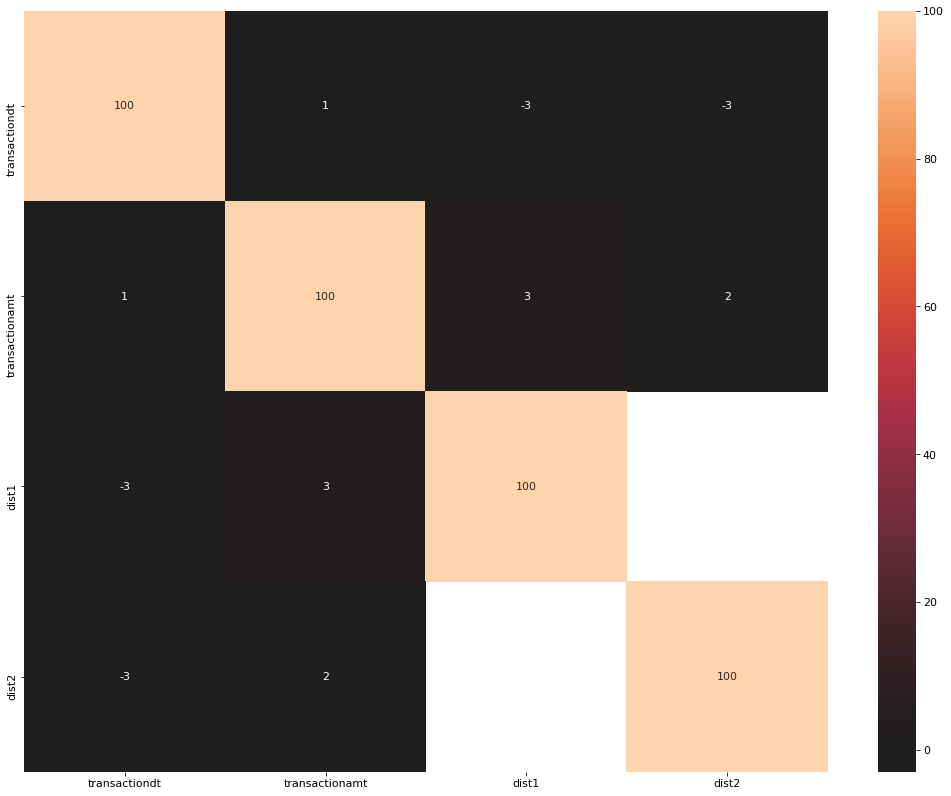

In [111]:
ngv_plot_corr_heatmap(df, non_cat_list[0]+non_cat_list[1])

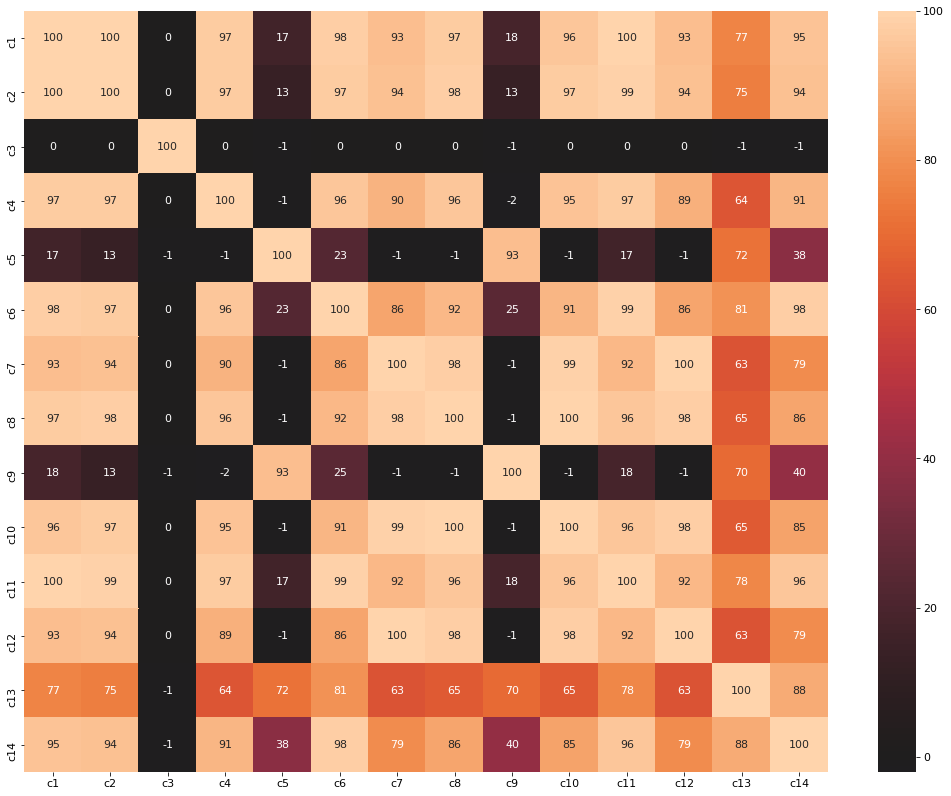

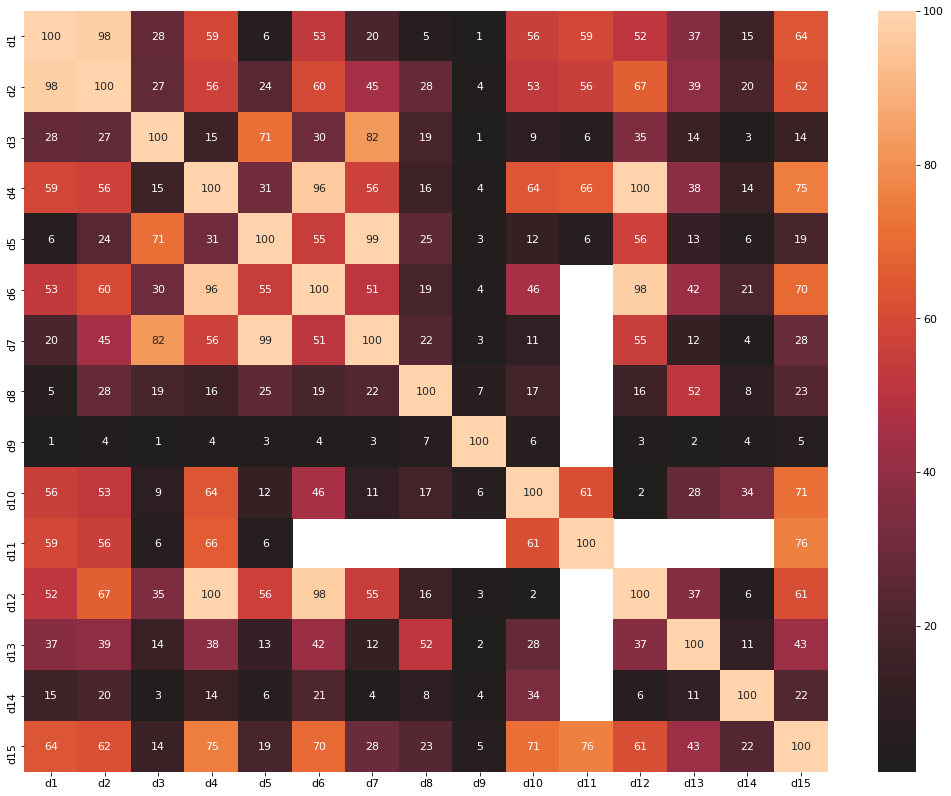

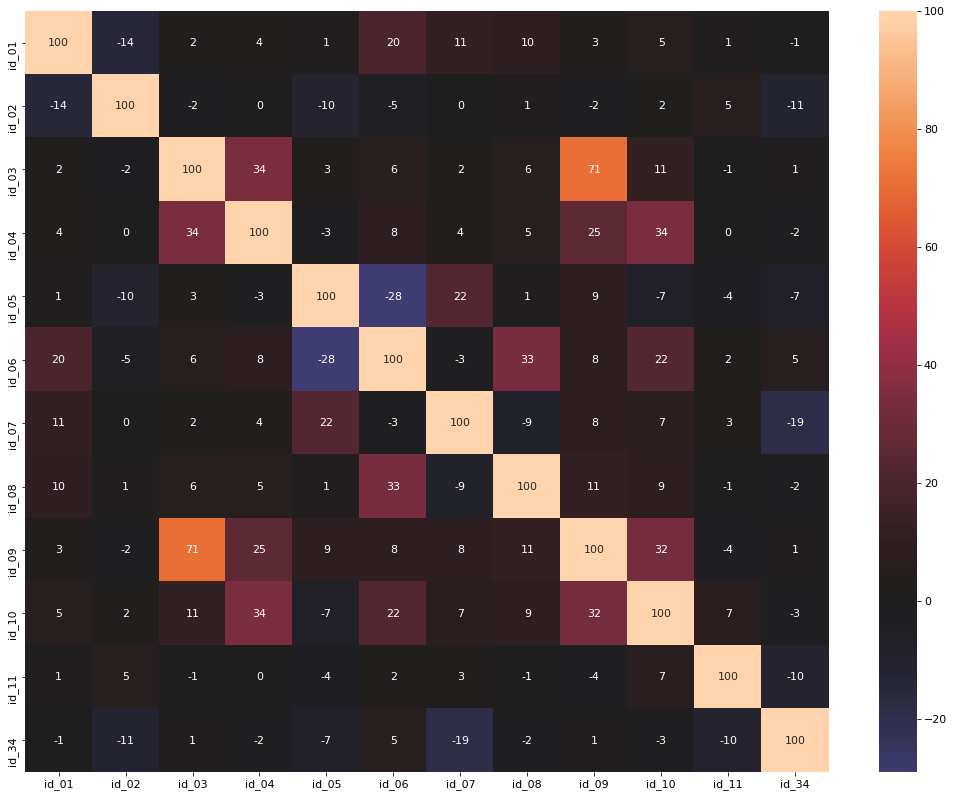

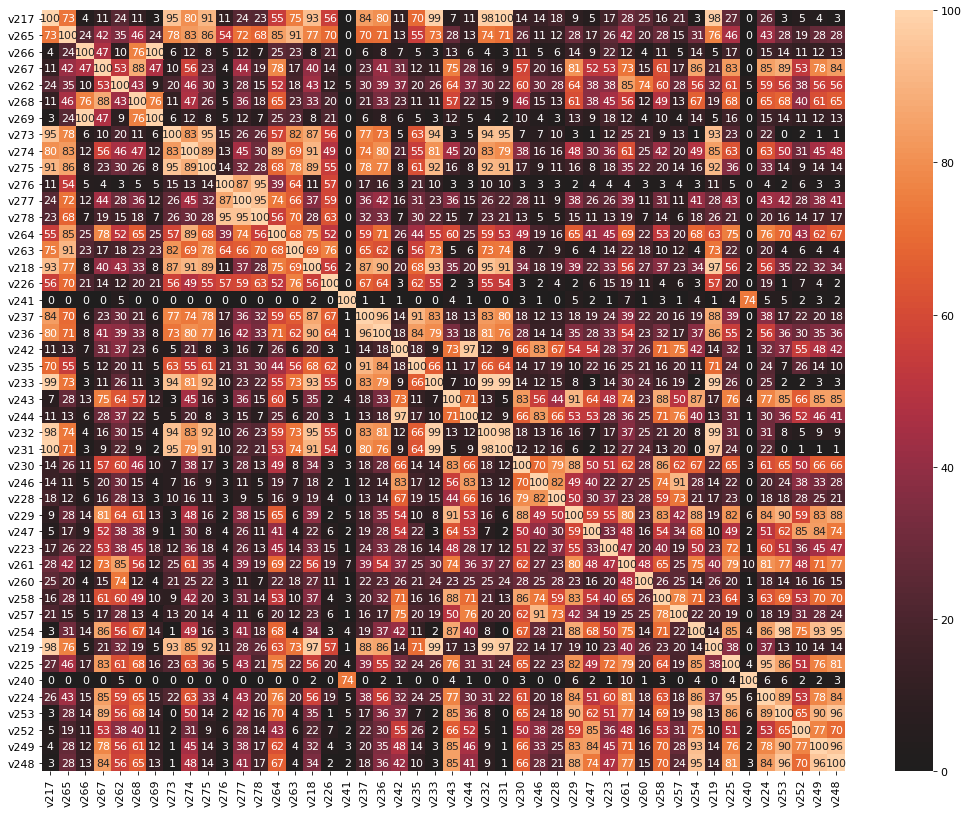

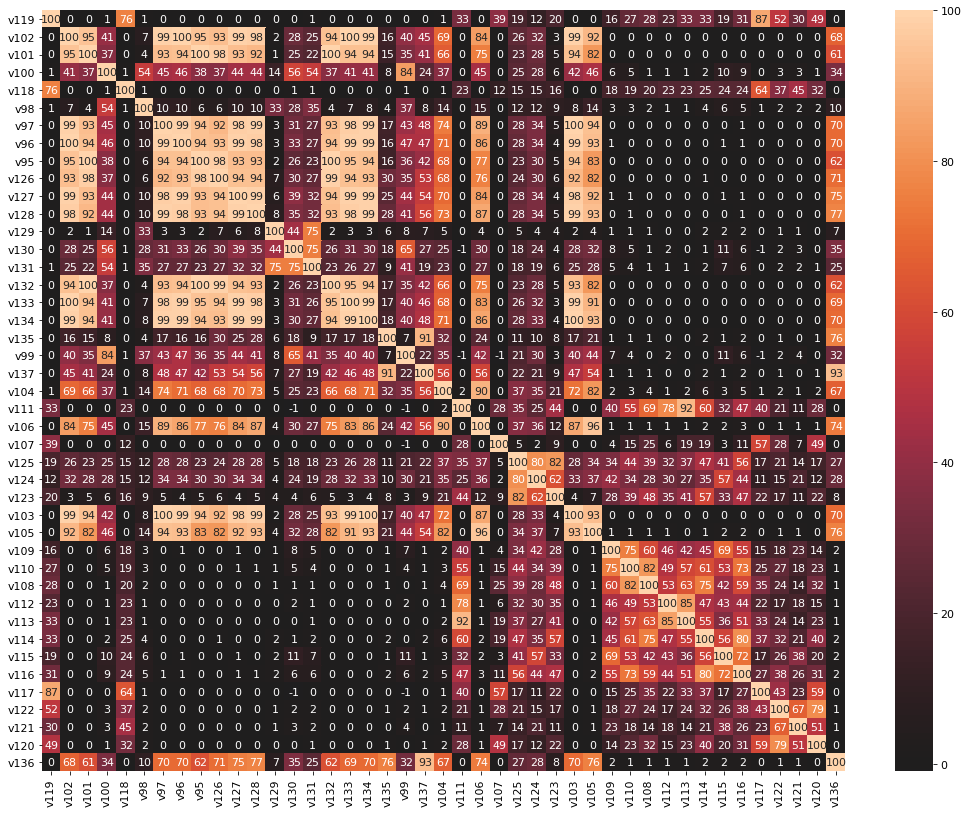

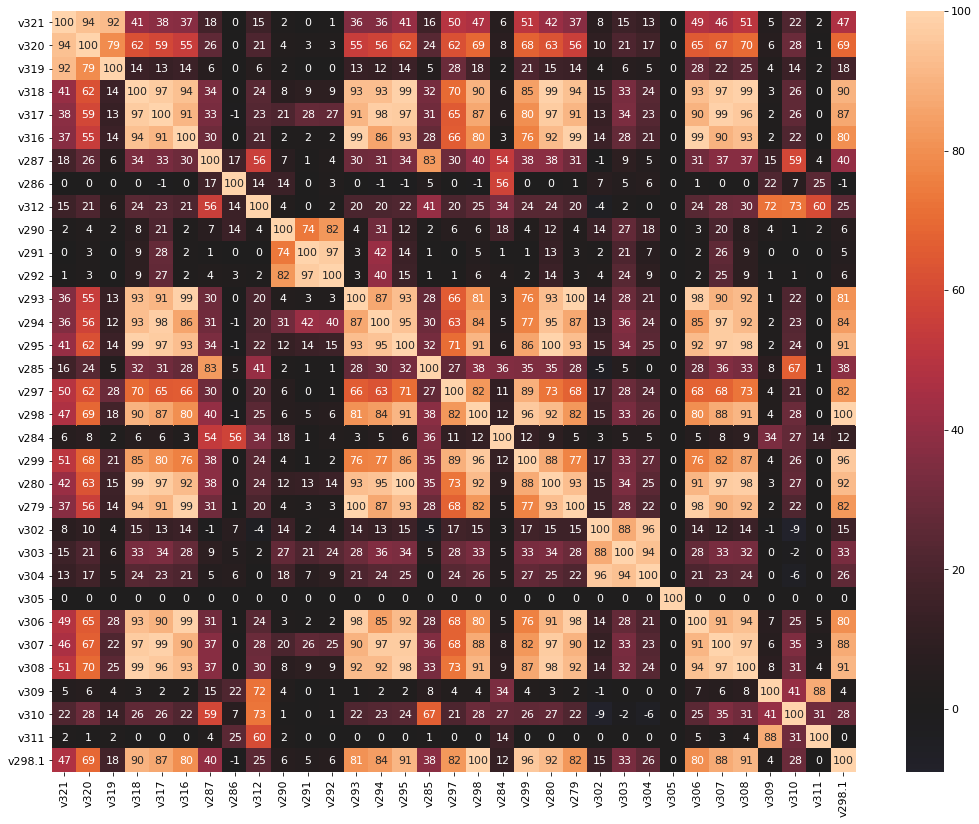

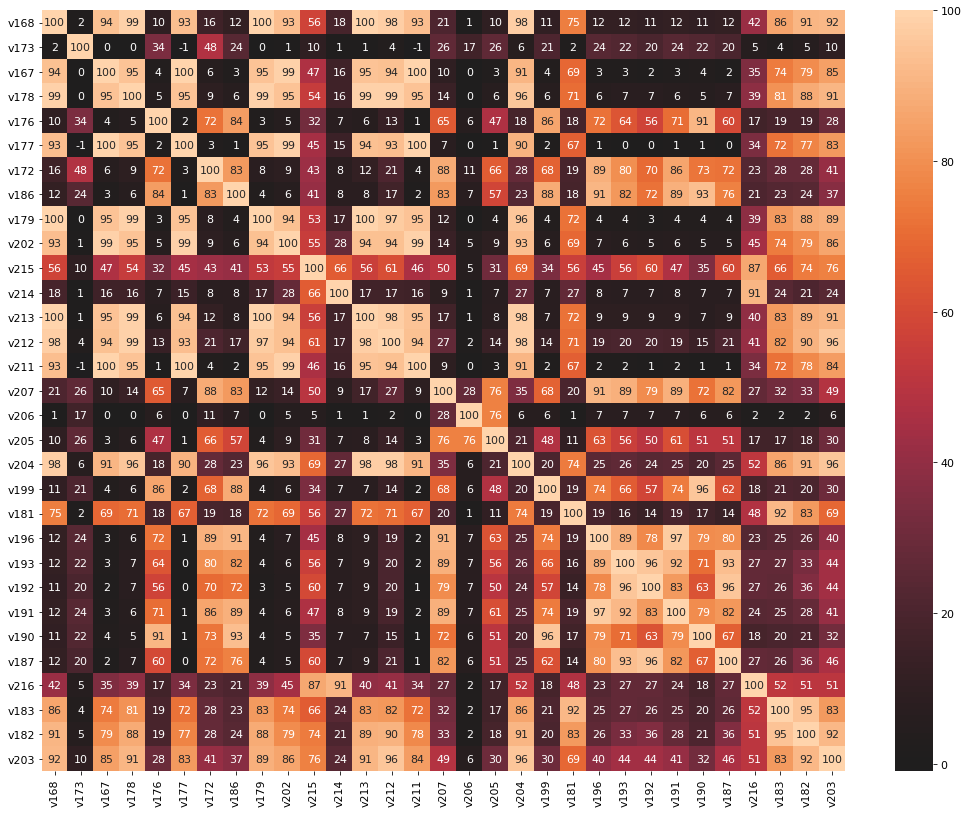

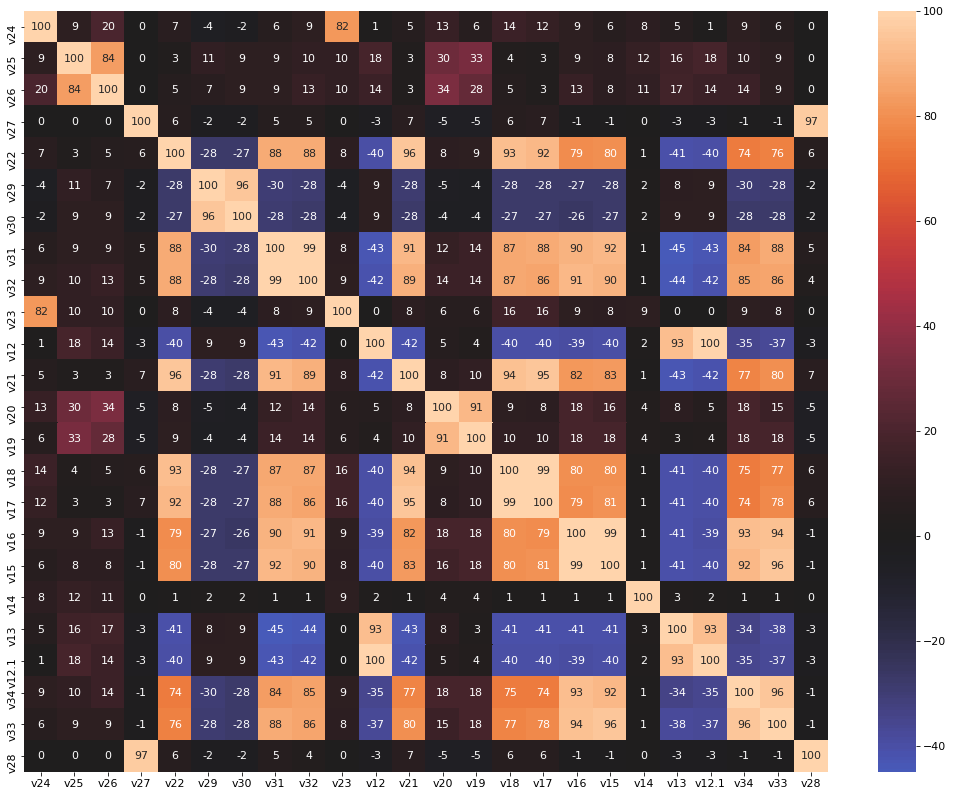

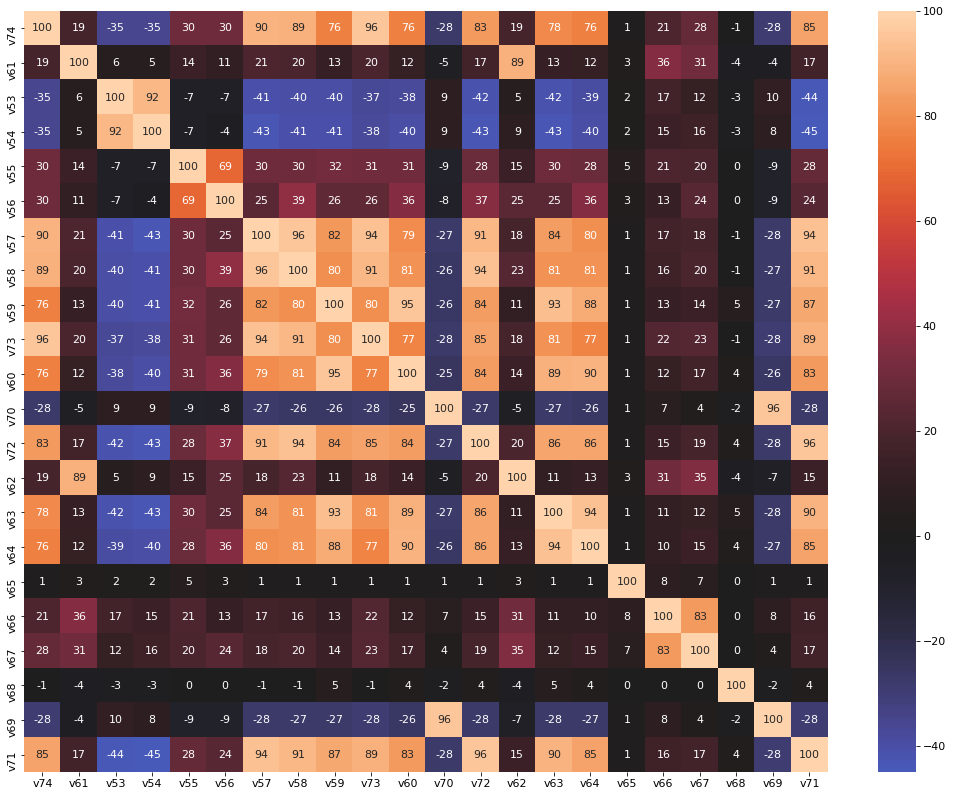

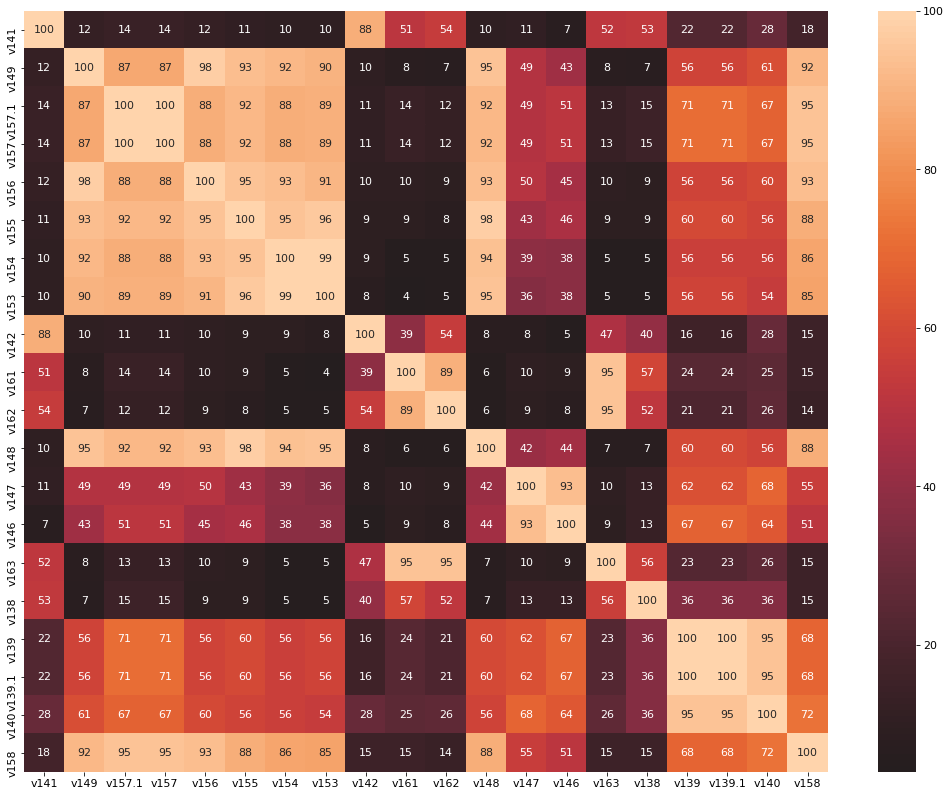

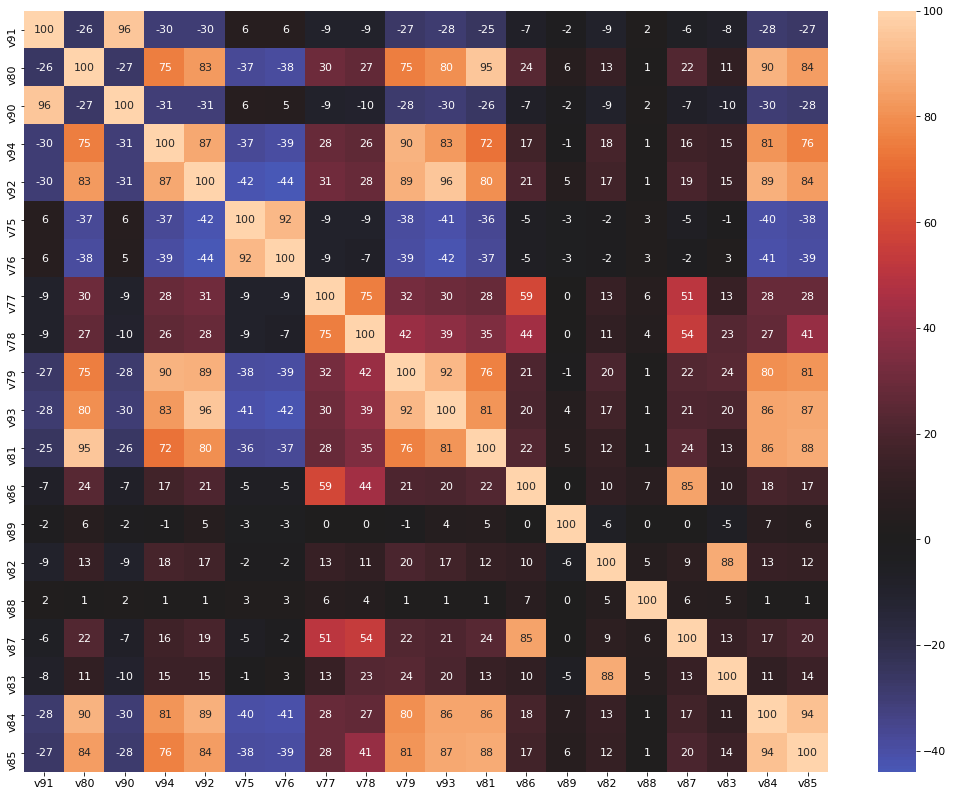

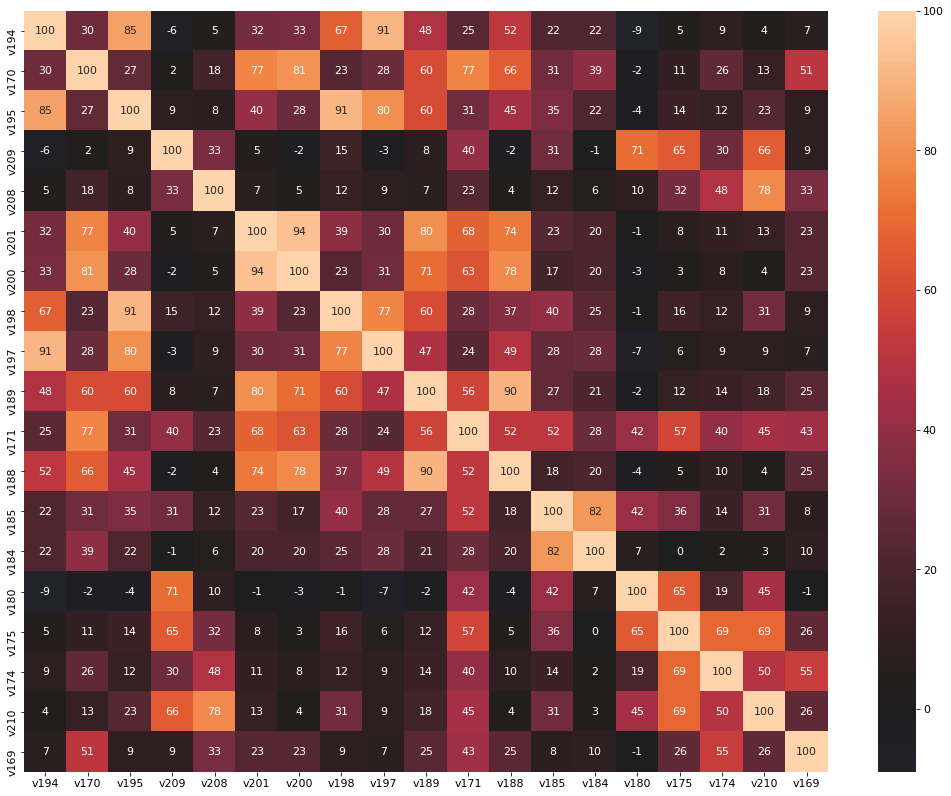

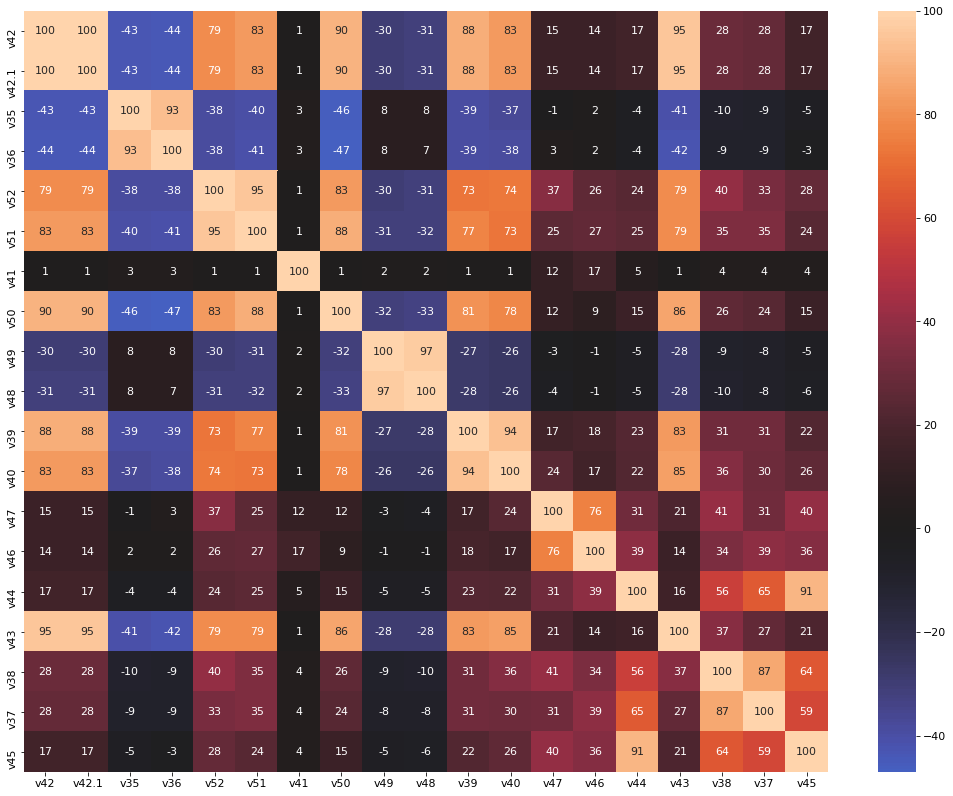

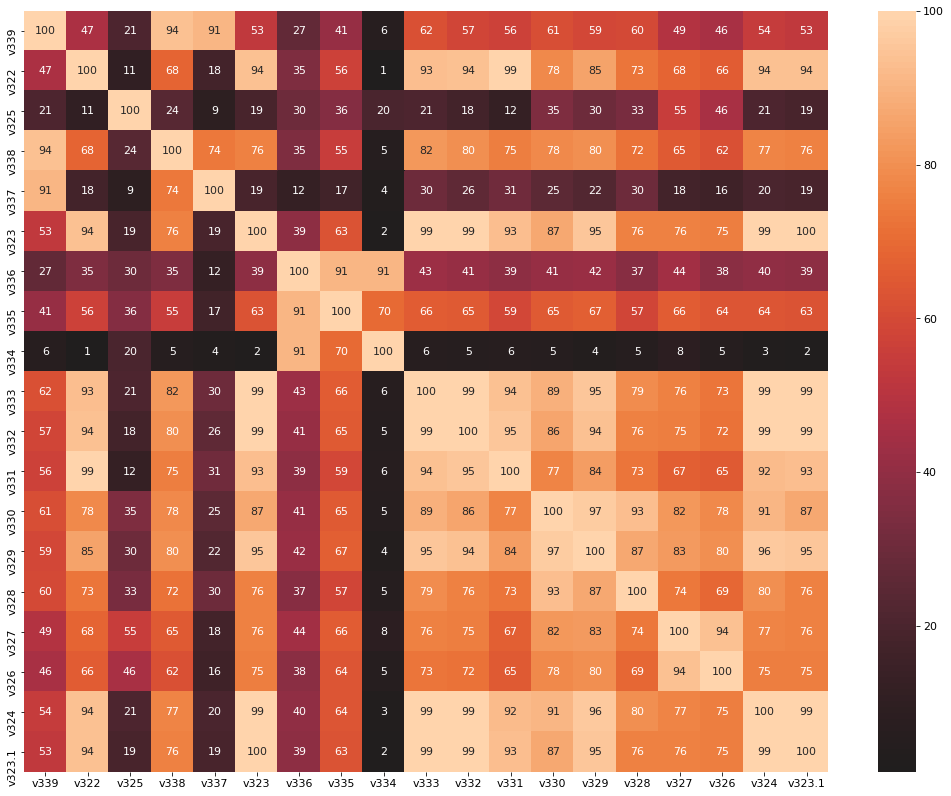

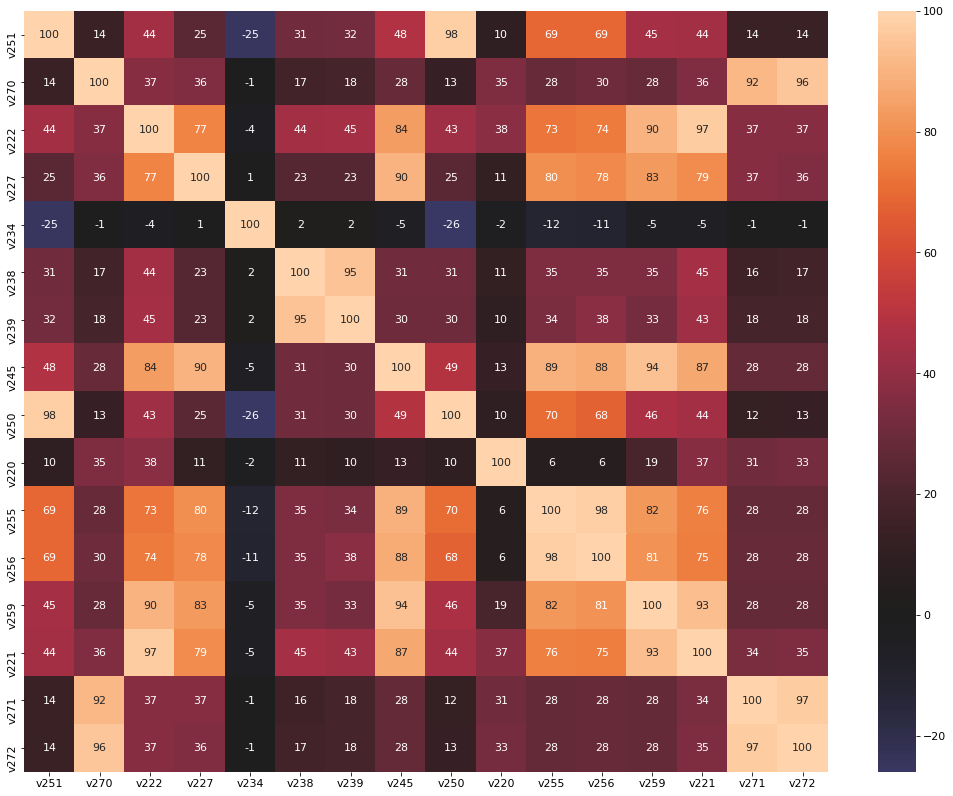

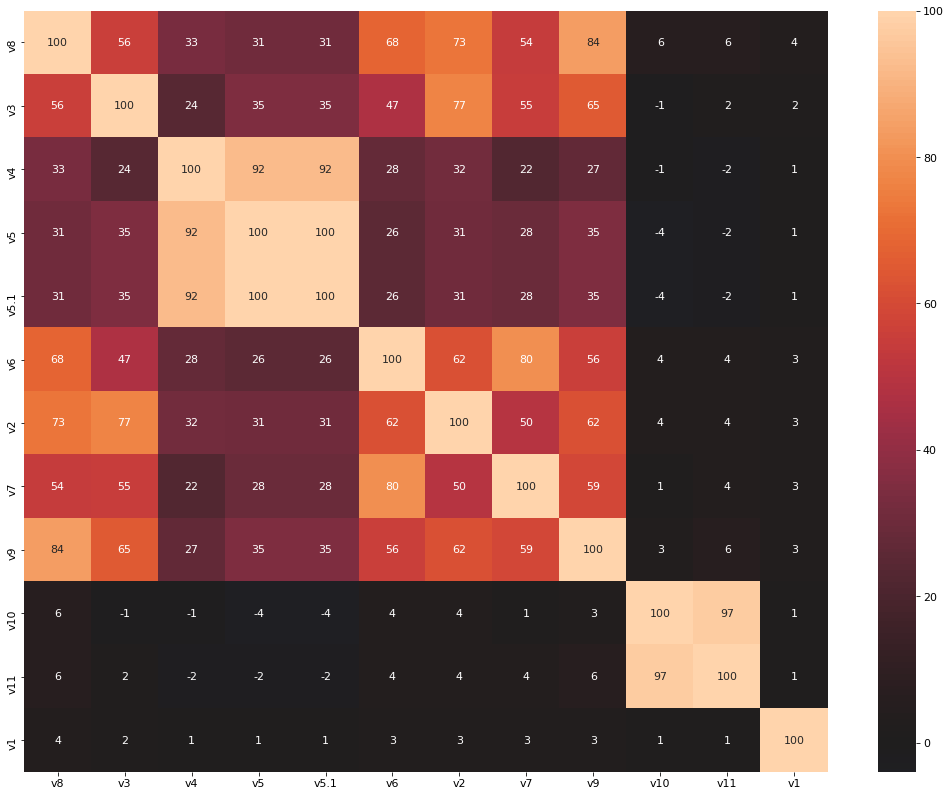

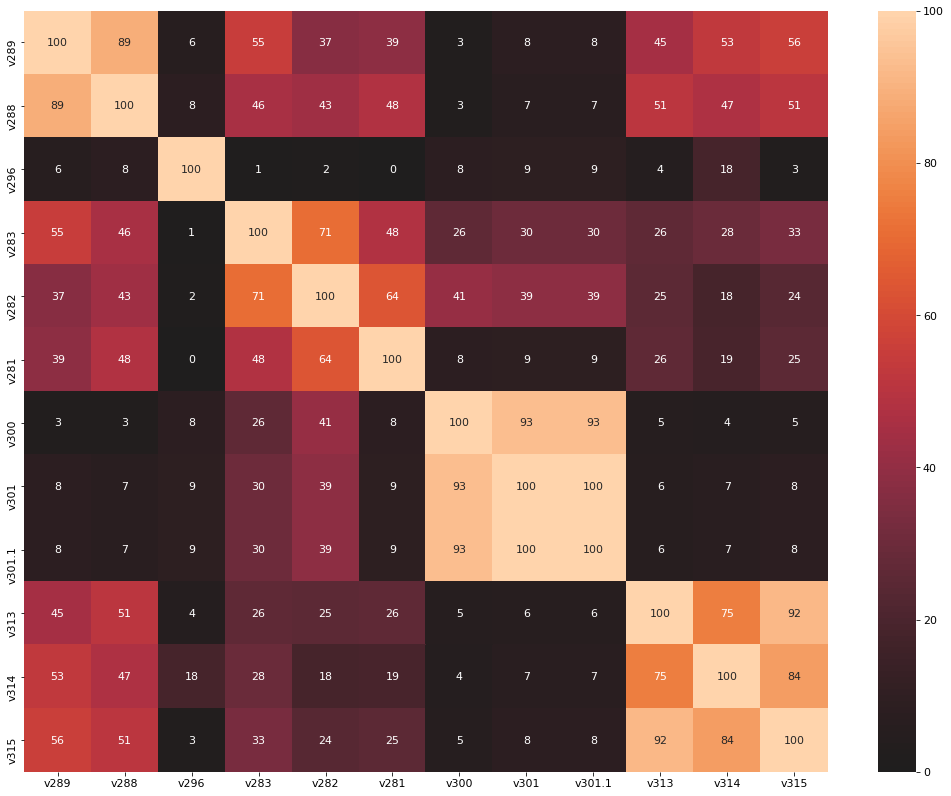

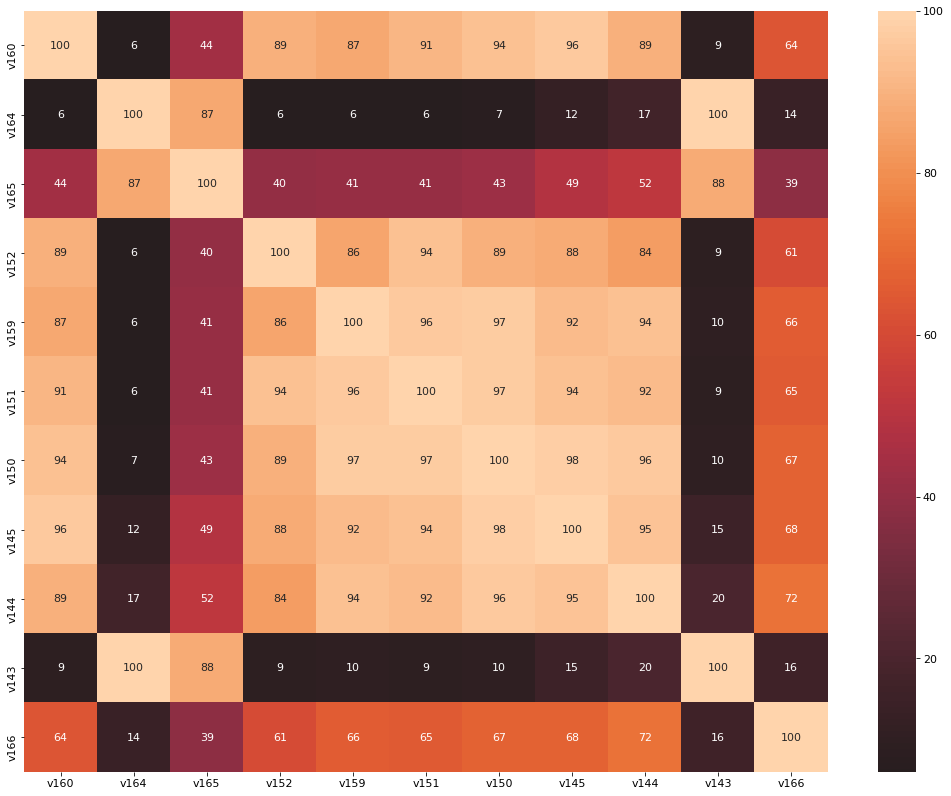

In [112]:
for x in range(2,20):
    ngv_plot_corr_heatmap(df, non_cat_list[x])

#### Outliers
##### Boxplot
Produce boxplots to visualize outliers for each variable. Take note of the following:
- The spread of each variable.
- The presence or absence of outliers.
- If outliers are present: Are they significant and how could you deal with them before training models?

#### Distributions
Plot histograms for each of the variables. 
- What do the different features' distributions look like? 
- How is the target variable distributed?
- If variables are not normally distributed, how does that affect model training?

### Additional Understanding
The above exploratory analysis is only a fraction of the possible methods available to inspect your data. It may be the case that over the course of this exploration, you've found other questions about the data you want to answer. Do so here.

## Outcome
At this point you should have a good understanding of the data and some strong ideas for how you want to approach modeling and the sort of issues you expect to face while you do so.